In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Flatten, Input
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/02_loss_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [7]:
EPOCHS = 30
BATCH_SIZE = 64
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)

Instructions for updating:
Colocations handled automatically by placer.


## MLP with one hidden layer and 600 neurons

In [9]:
wv_layer = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#First Dense Layer
x = Dense(600, activation='relu')(embedded_sequences)

x = Flatten()(x)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model = Model(inputs=[comment_input], outputs=preds)

## Train the model within the parameter space


-----Fold 1--------


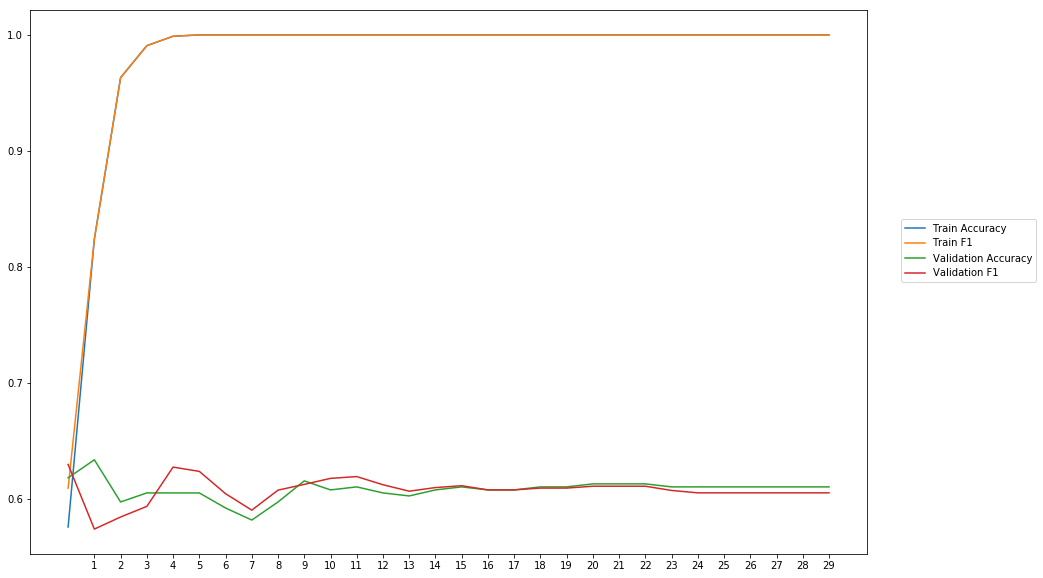

Average Accuracy: 60.81%
Average Precision: 60.76%
Average Recall: 60.94%
Average F1: 60.77%

-----Fold 2--------


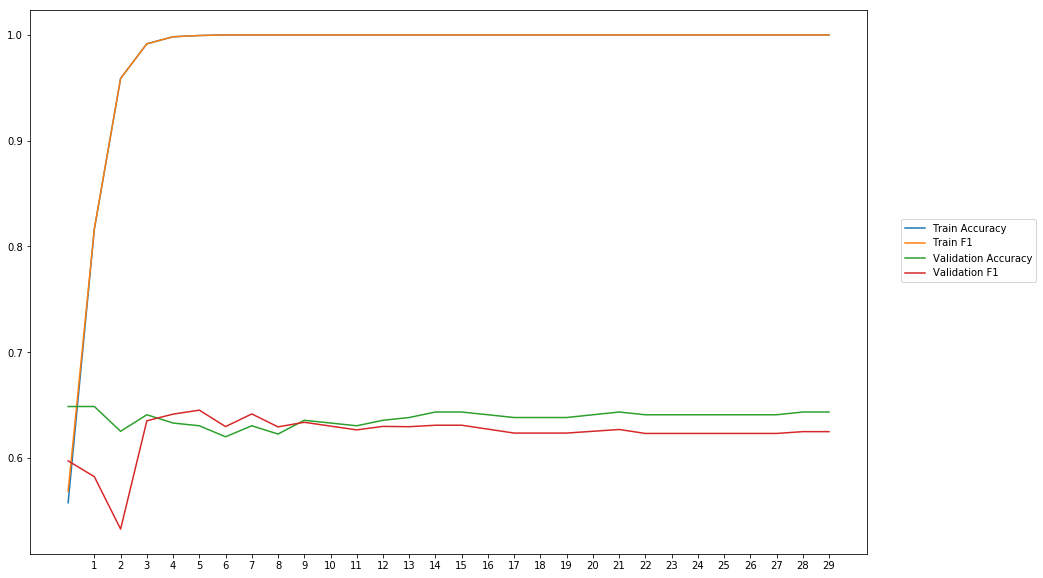

Average Accuracy: 63.75%
Average Precision: 64.72%
Average Recall: 60.37%
Average F1: 62.26%

-----Fold 3--------


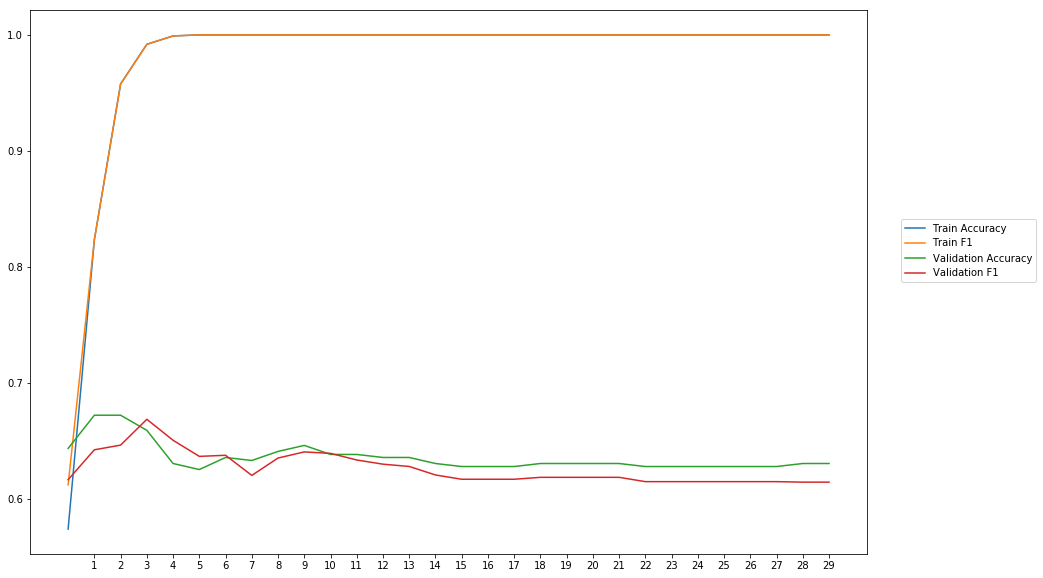

Average Accuracy: 63.54%
Average Precision: 63.97%
Average Recall: 61.40%
Average F1: 62.60%

-----Fold 4--------


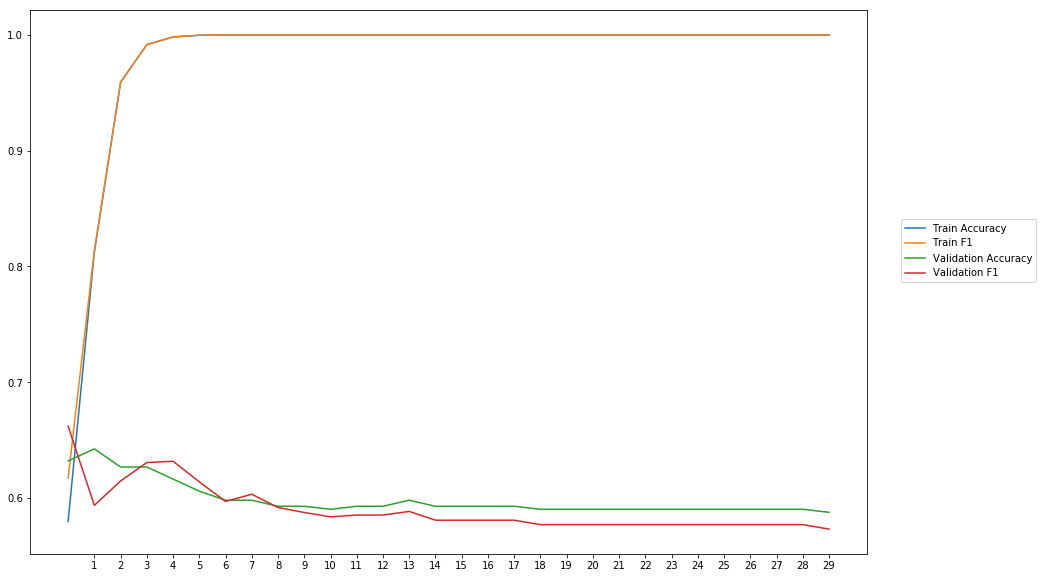

Average Accuracy: 59.84%
Average Precision: 60.11%
Average Recall: 58.12%
Average F1: 59.02%

-----Fold 5--------


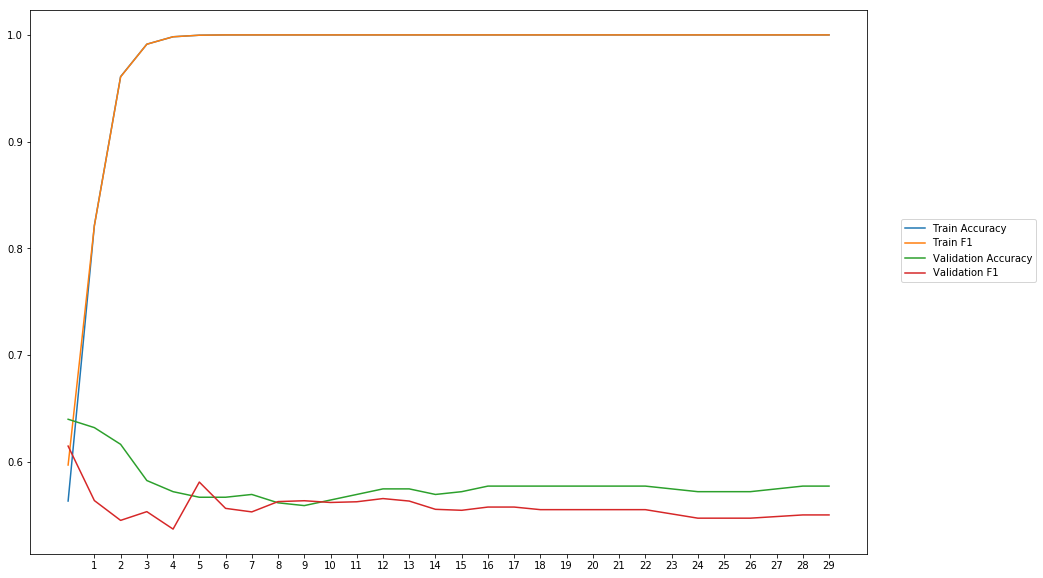

Average Accuracy: 57.82%
Average Precision: 58.67%
Average Recall: 53.28%
Average F1: 55.73%

-----Fold 6--------


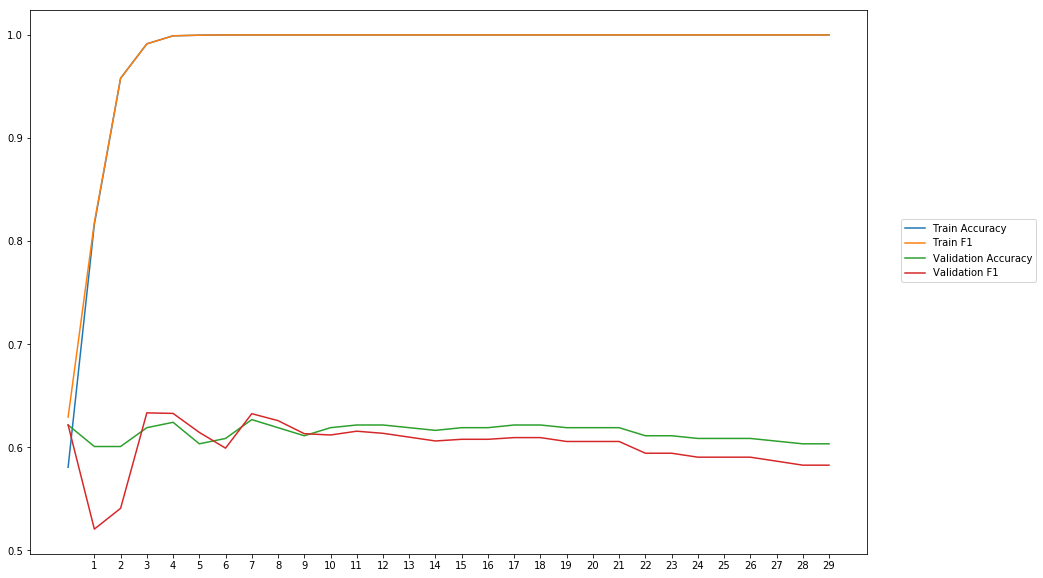

Average Accuracy: 61.42%
Average Precision: 62.01%
Average Recall: 58.64%
Average F1: 60.16%

-----Fold 7--------


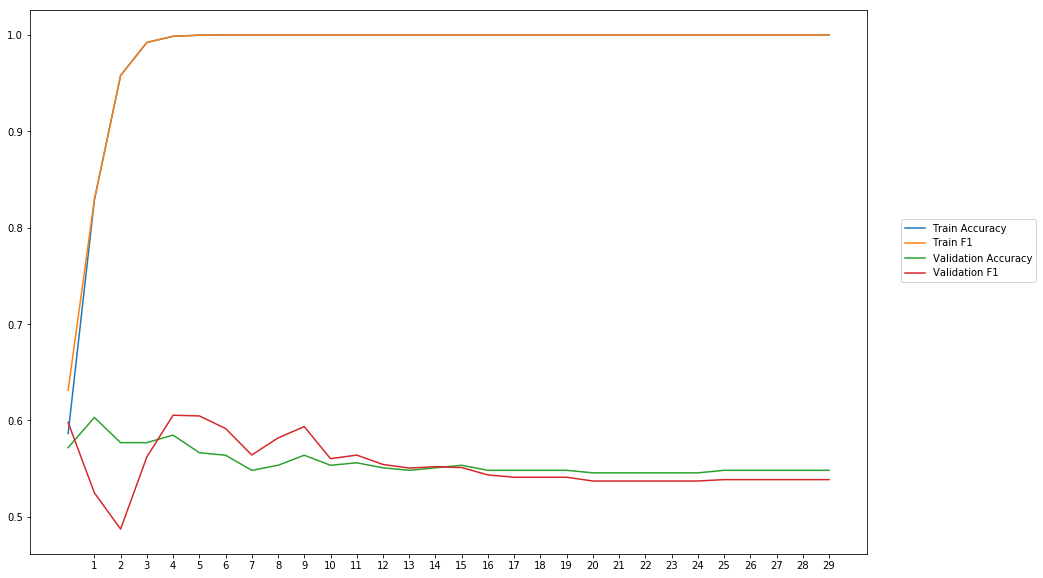

Average Accuracy: 55.62%
Average Precision: 55.69%
Average Recall: 55.36%
Average F1: 55.31%

-----Fold 8--------


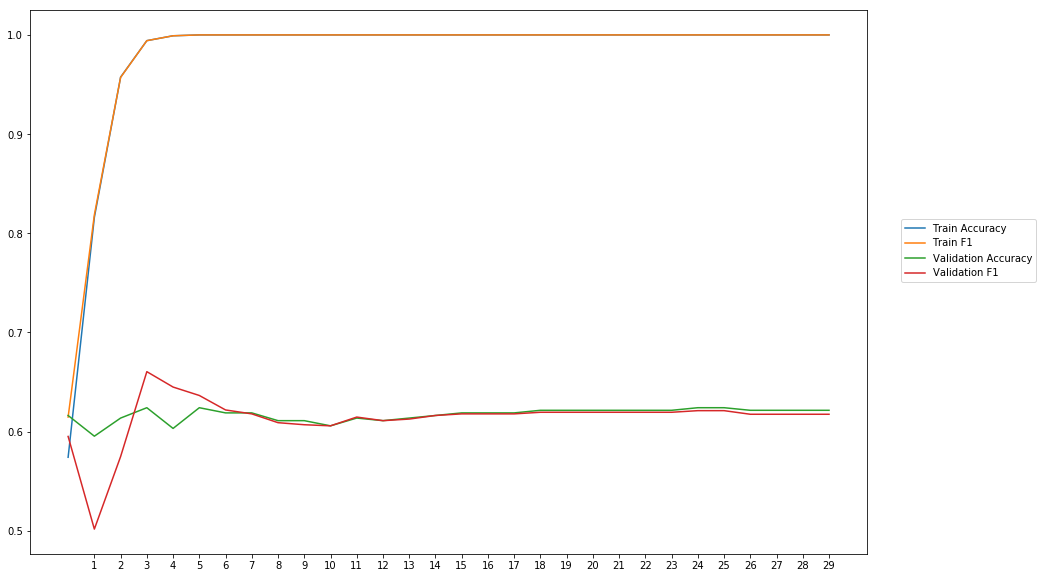

Average Accuracy: 61.71%
Average Precision: 61.79%
Average Recall: 61.27%
Average F1: 61.37%

-----Fold 9--------


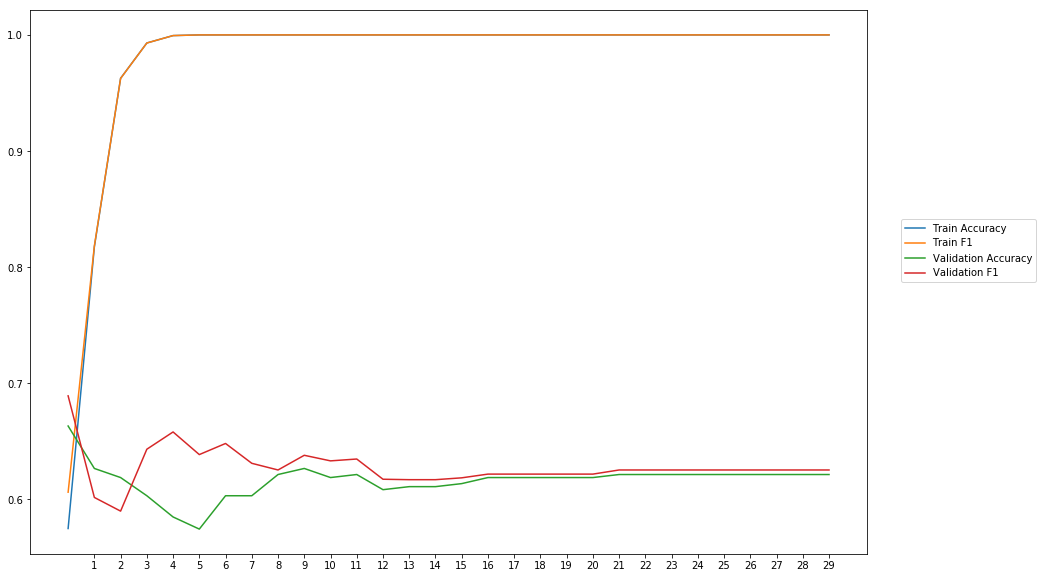

Average Accuracy: 61.65%
Average Precision: 60.98%
Average Recall: 65.08%
Average F1: 62.79%

-----Fold 10--------


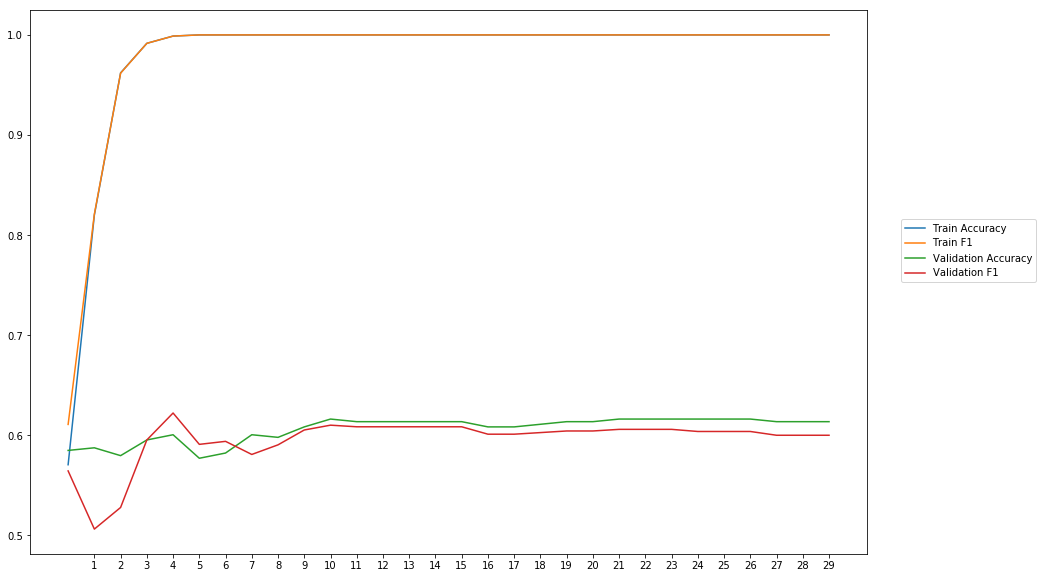

Average Accuracy: 60.64%
Average Precision: 61.07%
Average Recall: 58.34%
Average F1: 59.57%

-------Overallresults-------


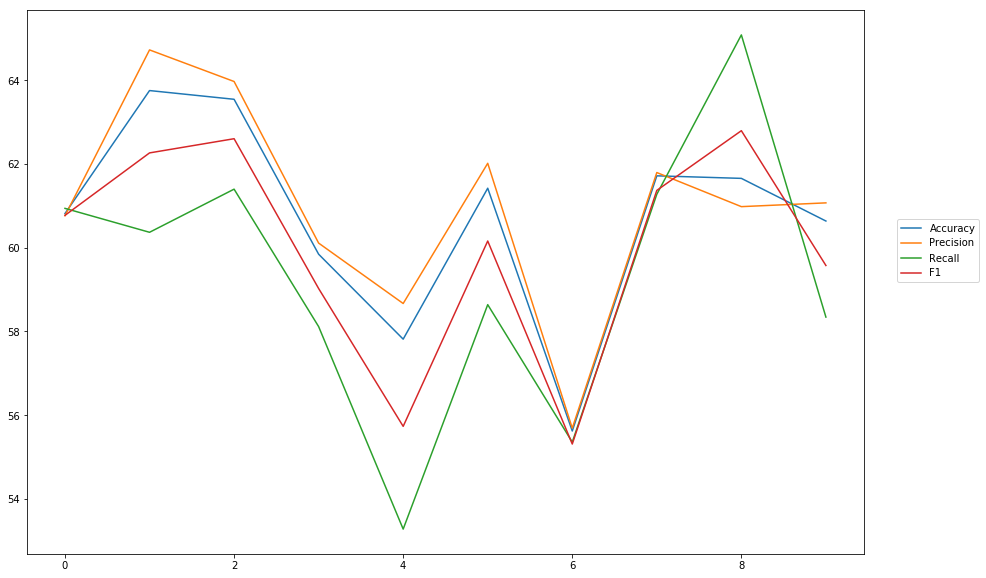

Accuracy: Mean = 60.68% (+/- 2.34%), Max = 63.75%, Min =  55.62%
Precision: Mean = 60.98% (+/- 2.42%), Max = 64.72%, Min =  55.69%
Recall: Mean = 59.28% (+/- 3.16%), Max = 65.08%, Min =  53.28%
F1: Mean = 59.96% (+/- 2.52%), Max = 62.79%, Min =  55.31%


In [12]:
lossfunction ='squared_hinge'
cross_val(model, EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'squared_hing_softmax')


-----Fold 1--------


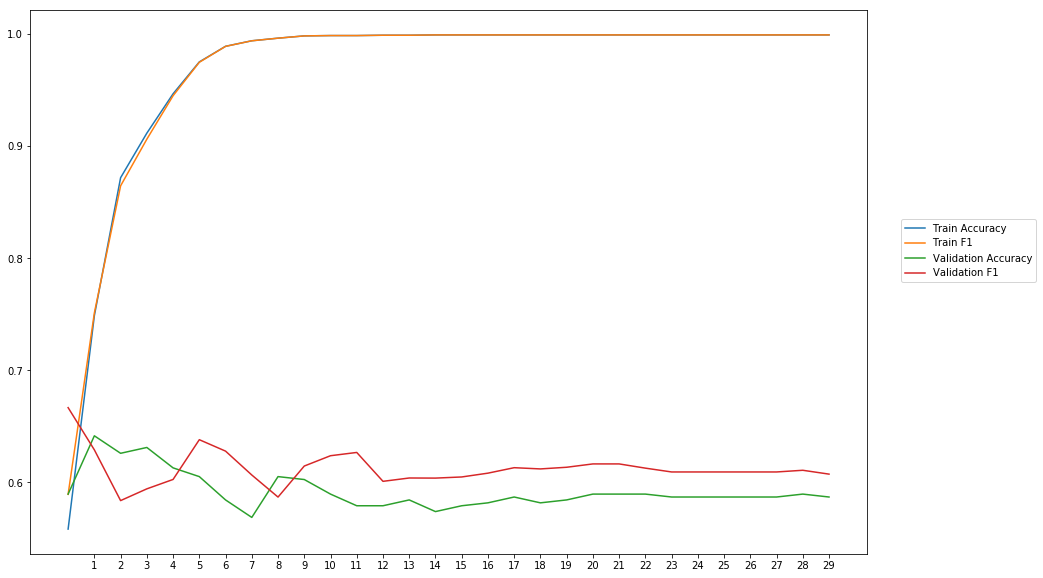

Average Accuracy: 59.23%
Average Precision: 58.46%
Average Recall: 64.77%
Average F1: 61.24%

-----Fold 2--------


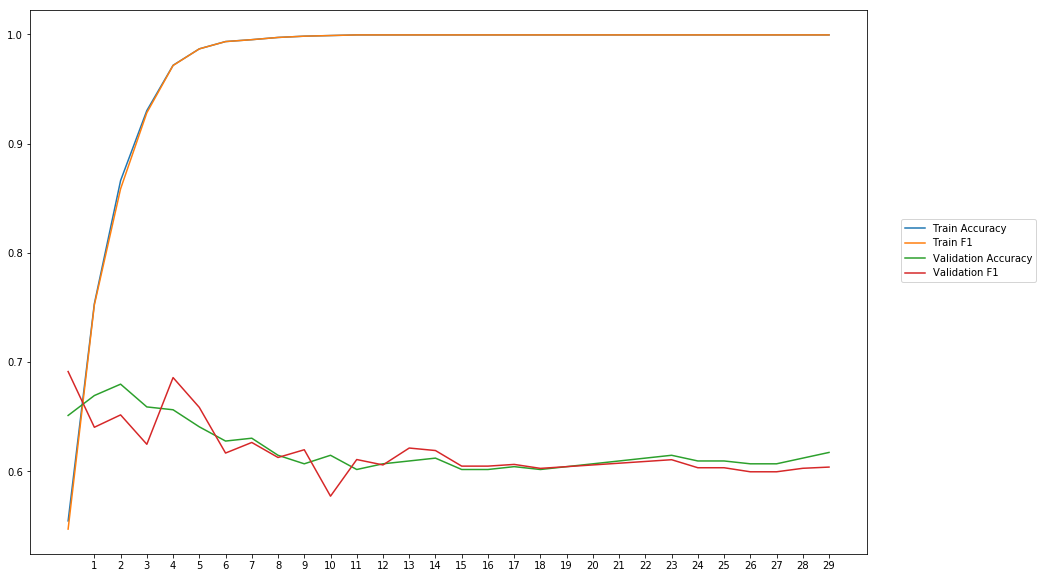

Average Accuracy: 61.99%
Average Precision: 61.92%
Average Recall: 61.87%
Average F1: 61.76%

-----Fold 3--------


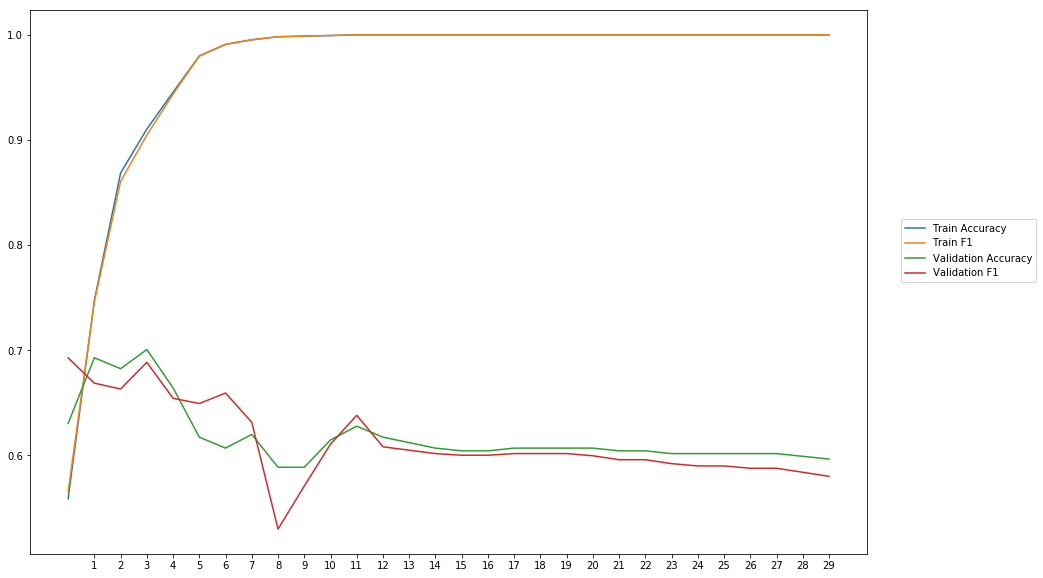

Average Accuracy: 61.72%
Average Precision: 61.77%
Average Recall: 61.15%
Average F1: 61.25%

-----Fold 4--------


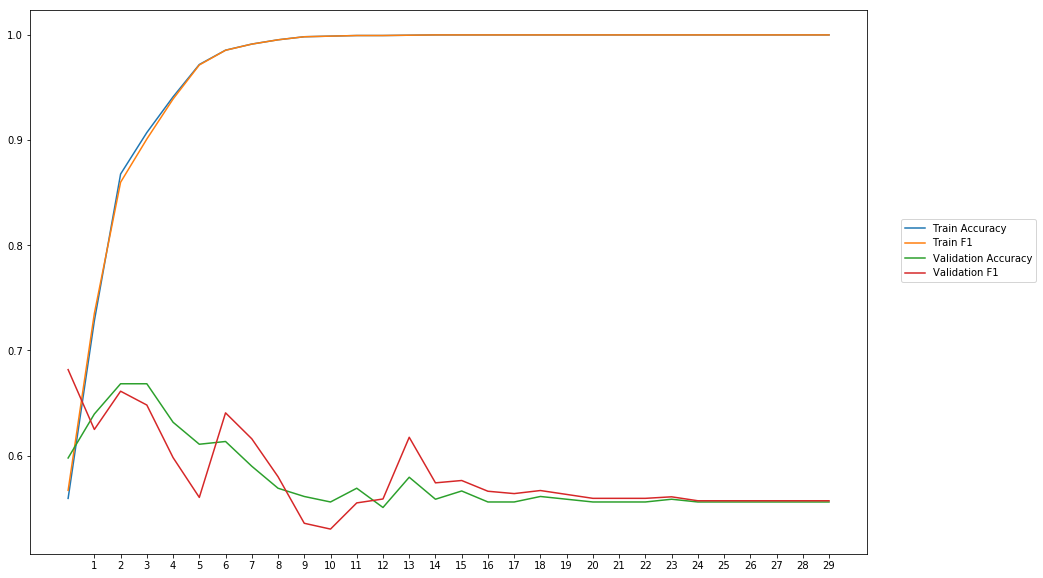

Average Accuracy: 57.76%
Average Precision: 57.69%
Average Recall: 58.80%
Average F1: 58.02%

-----Fold 5--------


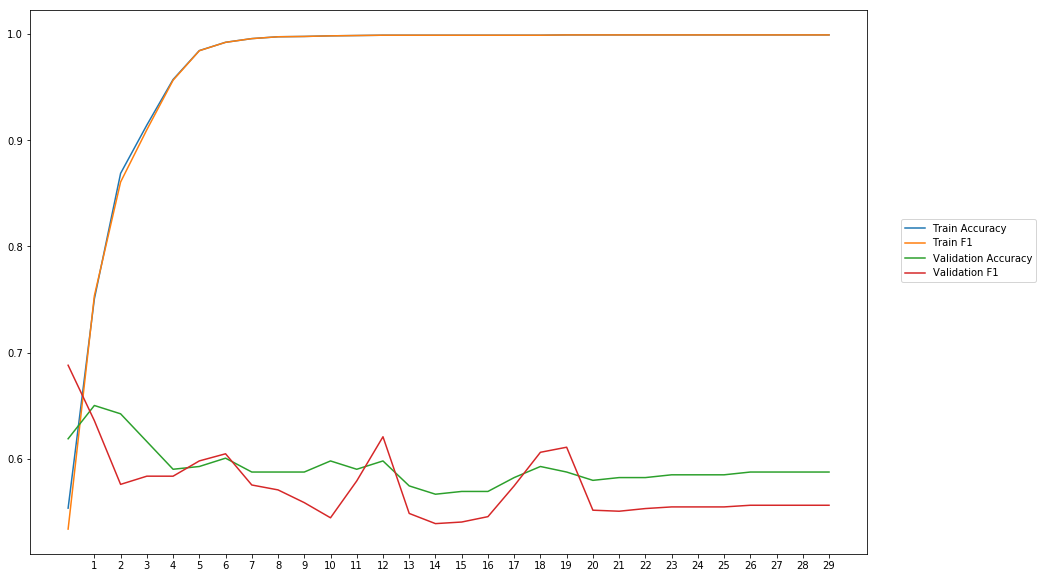

Average Accuracy: 59.16%
Average Precision: 59.90%
Average Recall: 55.64%
Average F1: 57.42%

-----Fold 6--------


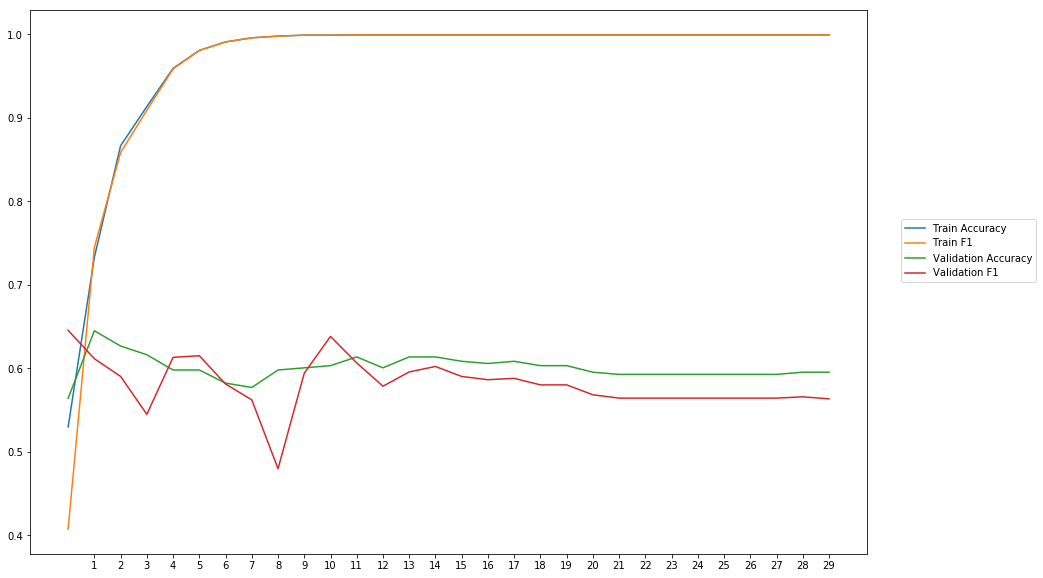

Average Accuracy: 60.04%
Average Precision: 61.15%
Average Recall: 56.00%
Average F1: 58.10%

-----Fold 7--------


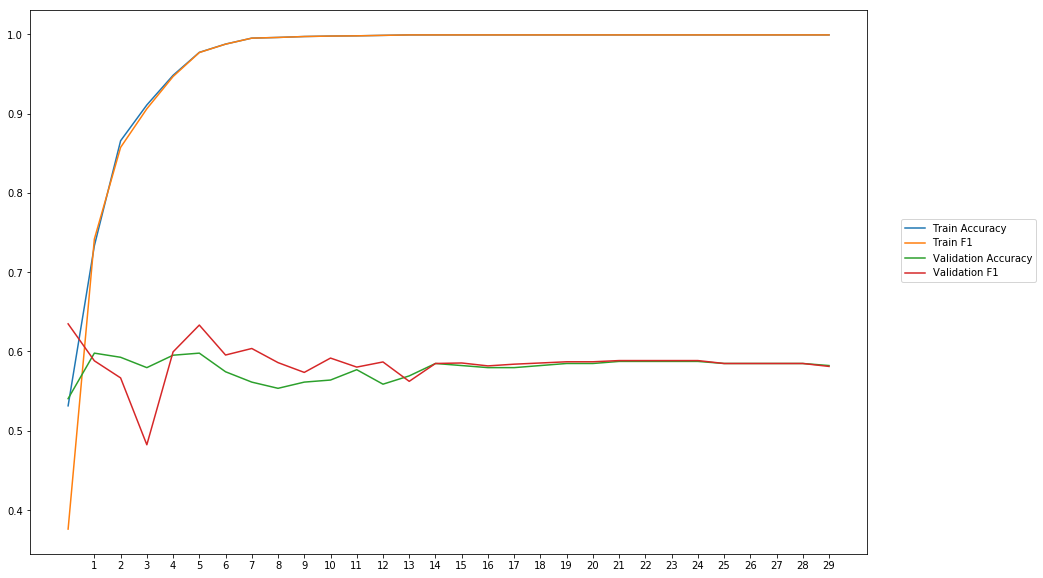

Average Accuracy: 57.91%
Average Precision: 57.71%
Average Recall: 59.86%
Average F1: 58.52%

-----Fold 8--------


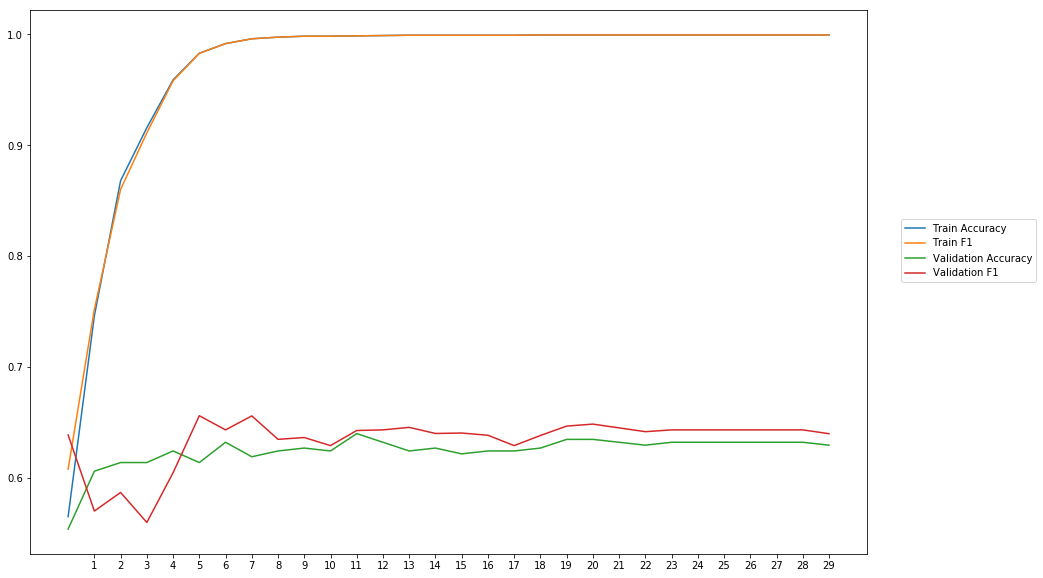

Average Accuracy: 62.39%
Average Precision: 61.75%
Average Recall: 65.48%
Average F1: 63.36%

-----Fold 9--------


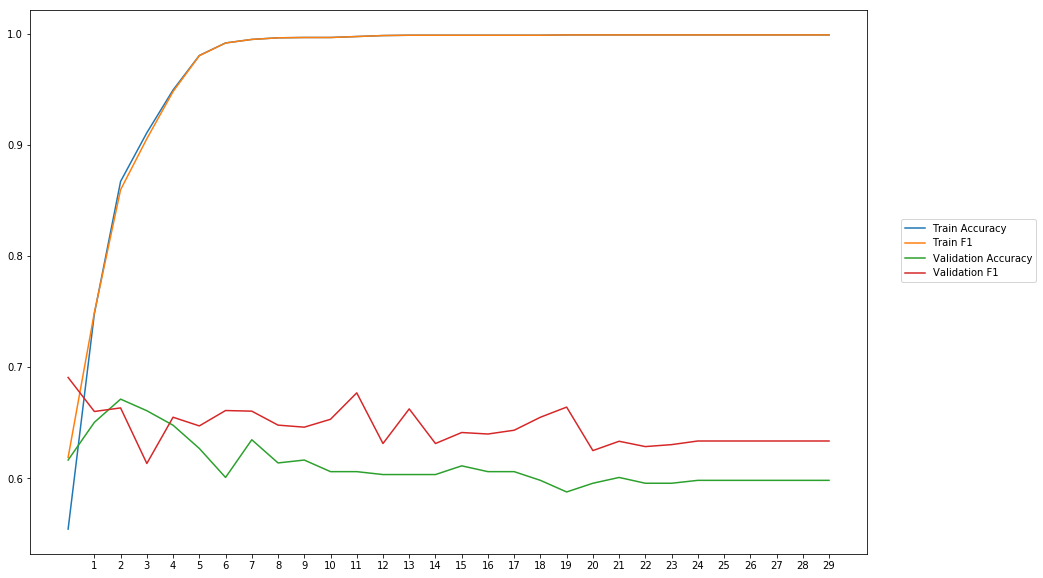

Average Accuracy: 61.13%
Average Precision: 59.51%
Average Recall: 71.05%
Average F1: 64.52%

-----Fold 10--------


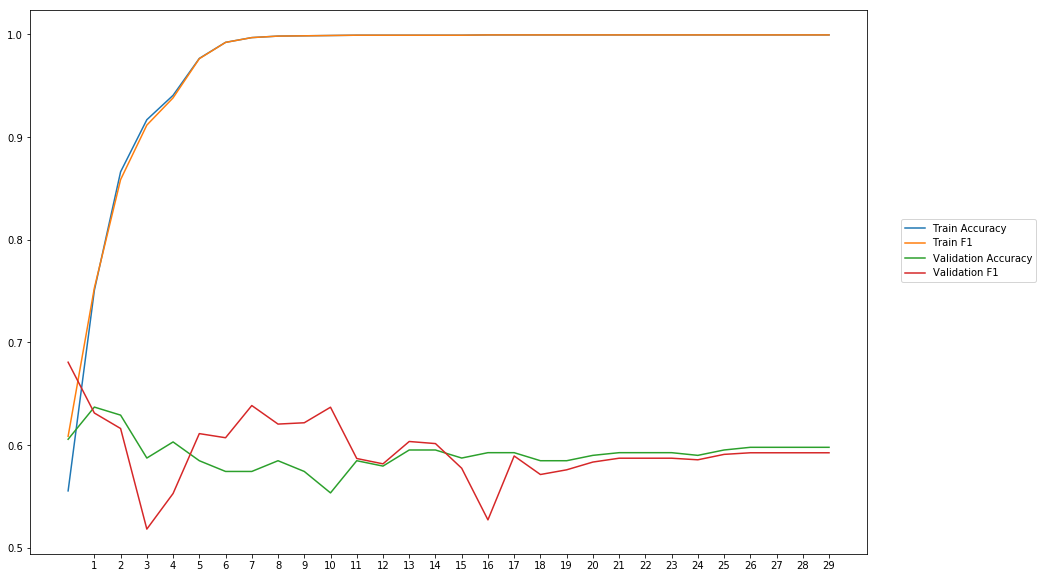

Average Accuracy: 59.17%
Average Precision: 59.11%
Average Recall: 60.68%
Average F1: 59.48%

-------Overallresults-------


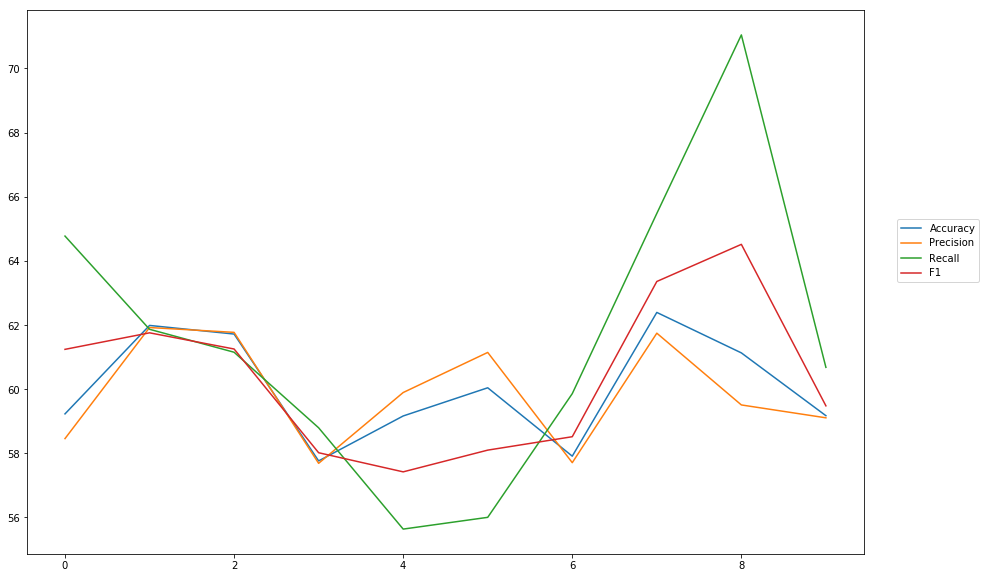

Accuracy: Mean = 60.05% (+/- 1.59%), Max = 62.39%, Min =  57.76%
Precision: Mean = 59.90% (+/- 1.58%), Max = 61.92%, Min =  57.69%
Recall: Mean = 61.53% (+/- 4.40%), Max = 71.05%, Min =  55.64%
F1: Mean = 60.37% (+/- 2.31%), Max = 64.52%, Min =  57.42%


In [14]:
lossfunction ='hinge'
cross_val(model, EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'hing_softmax')

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

-----Fold 1--------


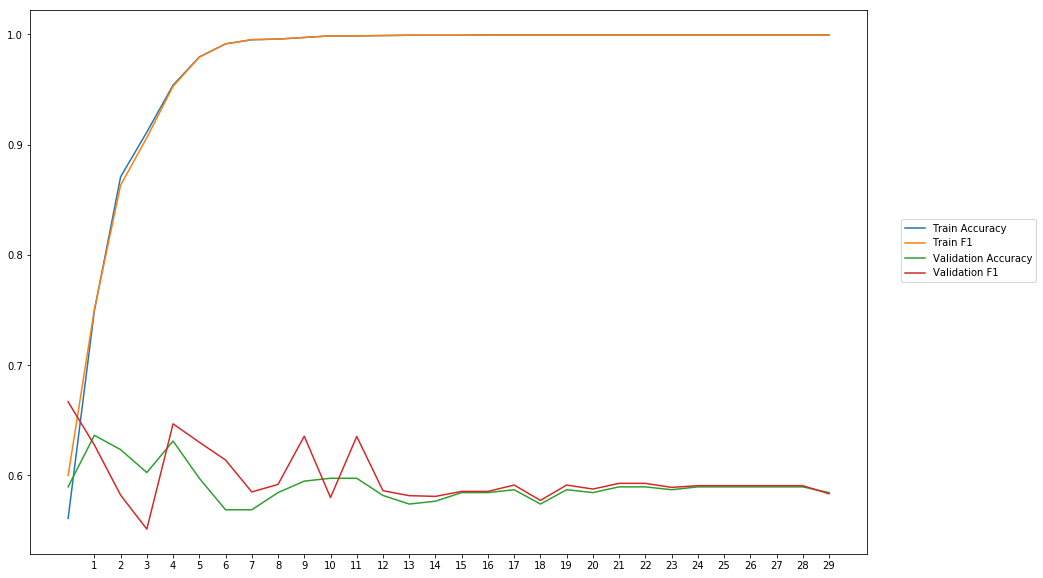

Average Accuracy: 59.08%
Average Precision: 58.76%
Average Recall: 61.20%
Average F1: 59.75%

-----Fold 2--------


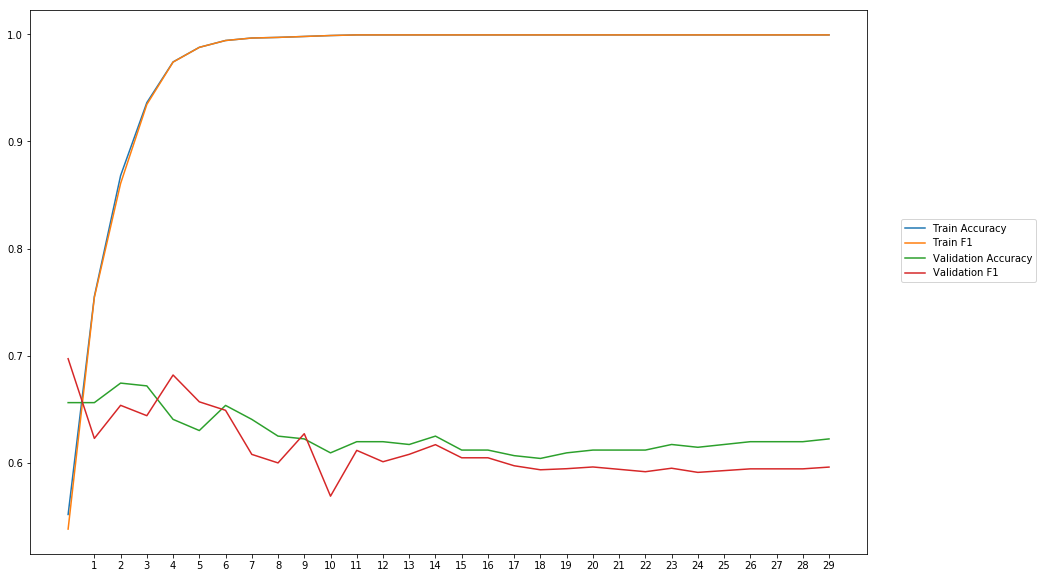

Average Accuracy: 62.58%
Average Precision: 63.18%
Average Recall: 59.84%
Average F1: 61.28%

-----Fold 3--------


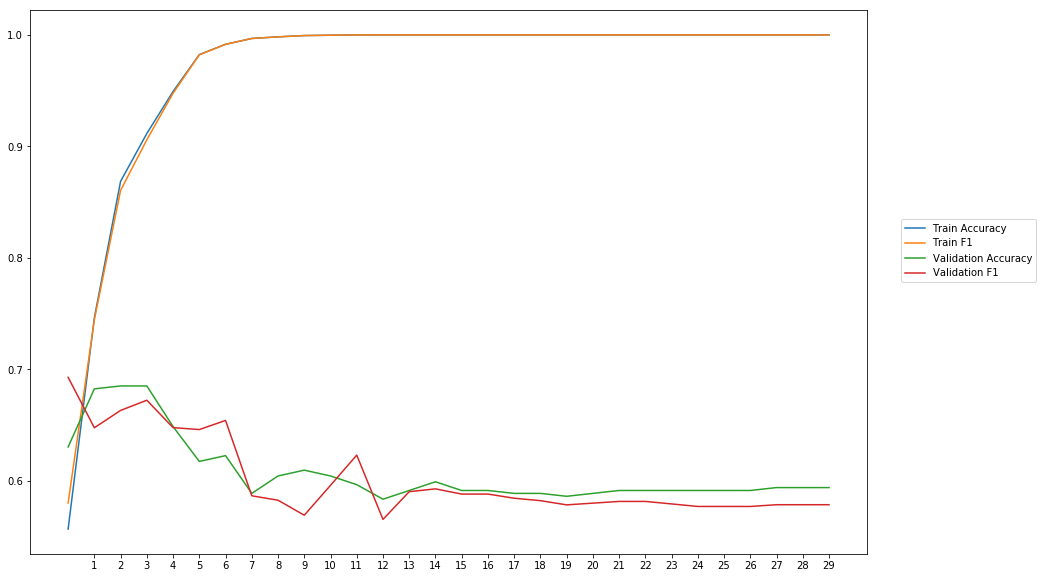

Average Accuracy: 60.69%
Average Precision: 60.80%
Average Recall: 59.81%
Average F1: 60.11%

-----Fold 4--------


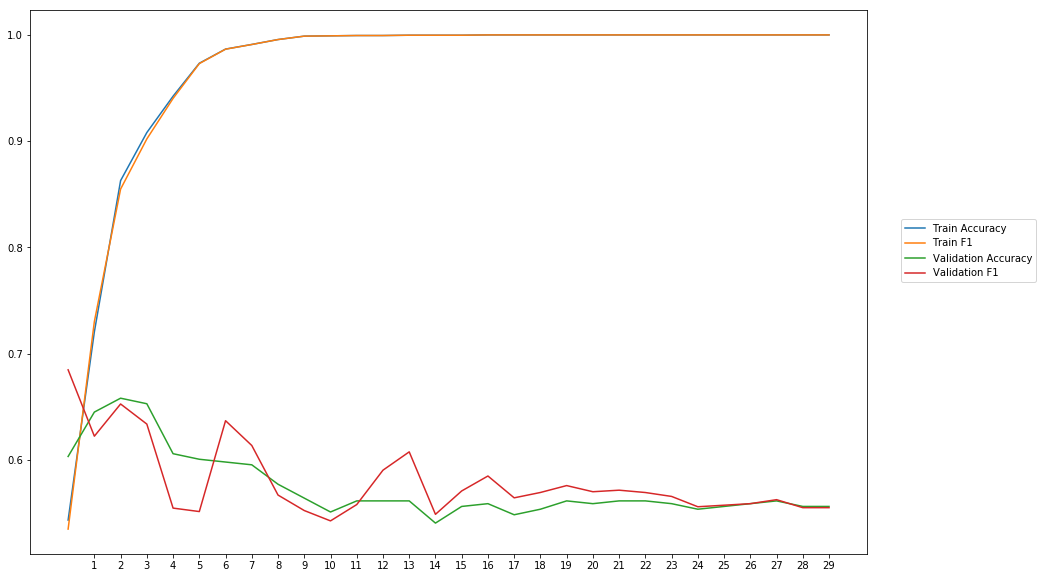

Average Accuracy: 57.45%
Average Precision: 57.30%
Average Recall: 59.21%
Average F1: 58.00%

-----Fold 5--------


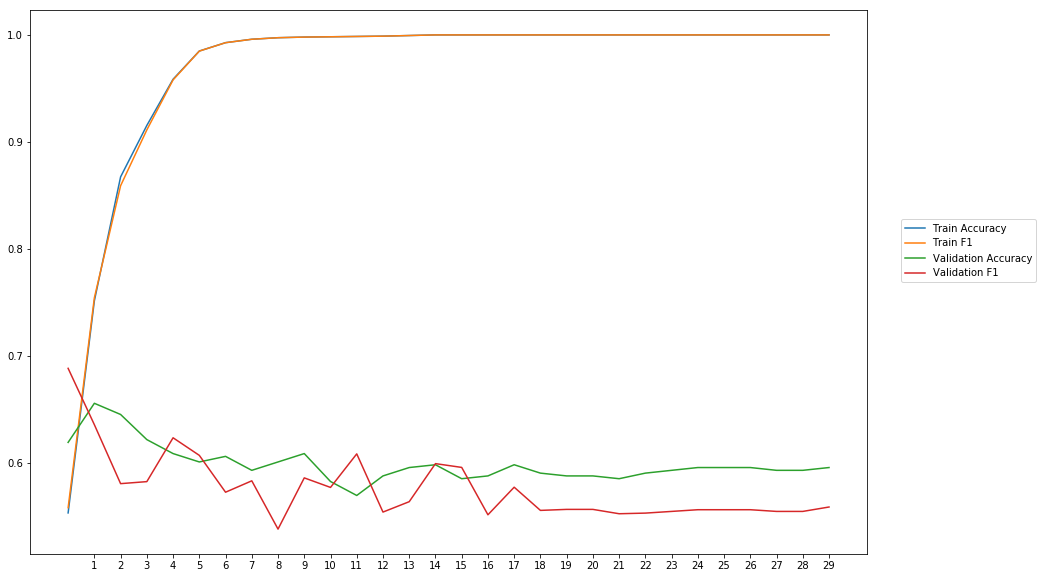

Average Accuracy: 59.86%
Average Precision: 61.02%
Average Recall: 55.11%
Average F1: 57.60%

-----Fold 6--------


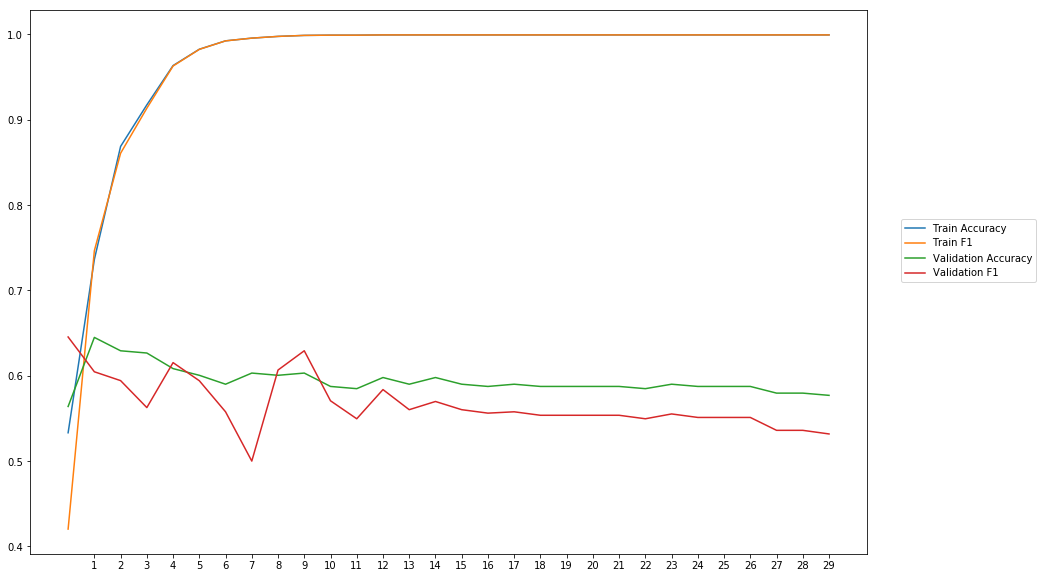

Average Accuracy: 59.40%
Average Precision: 60.79%
Average Recall: 53.61%
Average F1: 56.65%

-----Fold 7--------


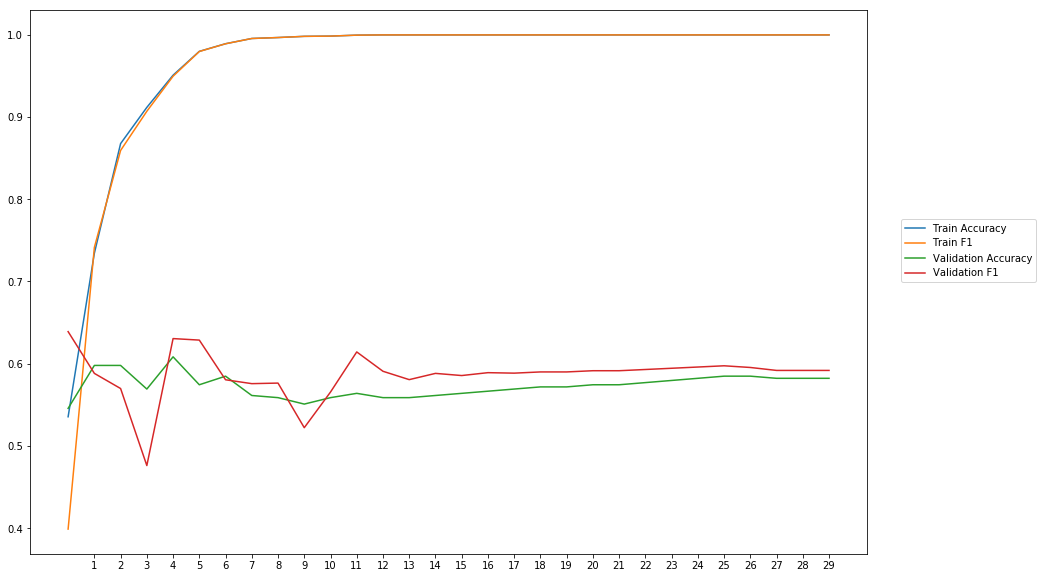

Average Accuracy: 57.33%
Average Precision: 56.85%
Average Recall: 61.19%
Average F1: 58.68%

-----Fold 8--------


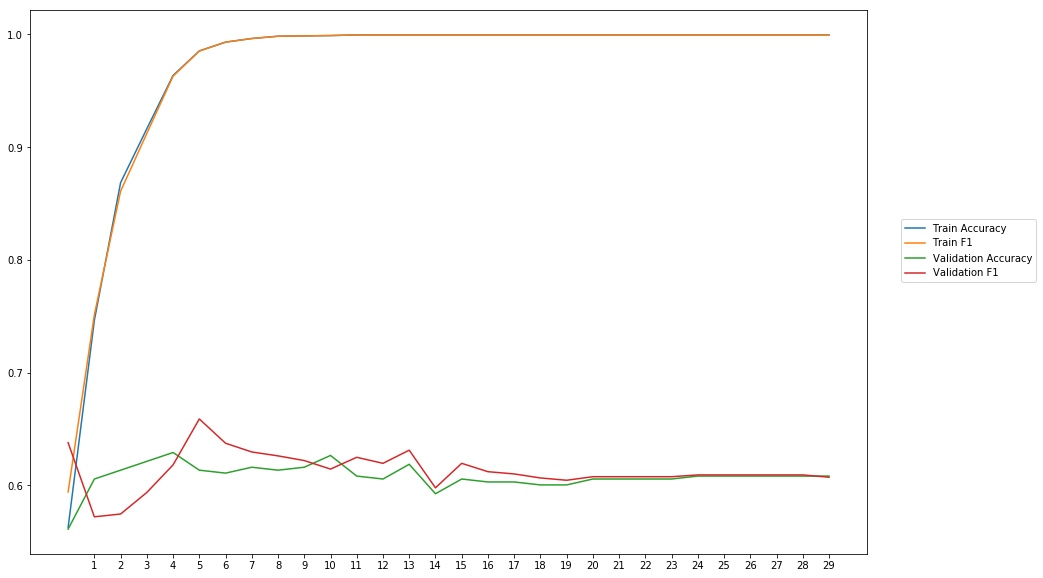

Average Accuracy: 60.80%
Average Precision: 60.49%
Average Recall: 62.53%
Average F1: 61.33%

-----Fold 9--------


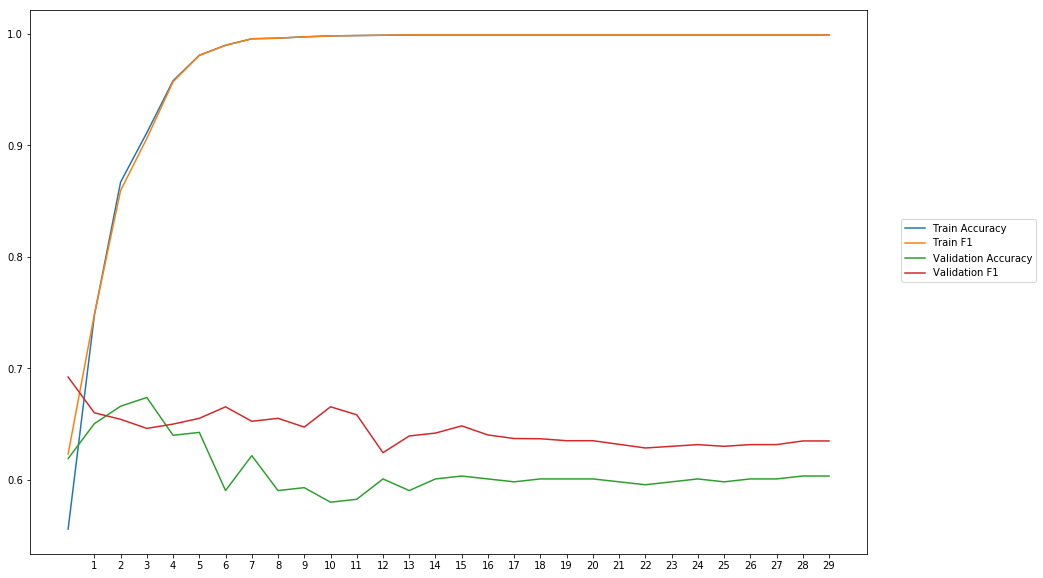

Average Accuracy: 60.79%
Average Precision: 59.16%
Average Recall: 71.22%
Average F1: 64.39%

-----Fold 10--------


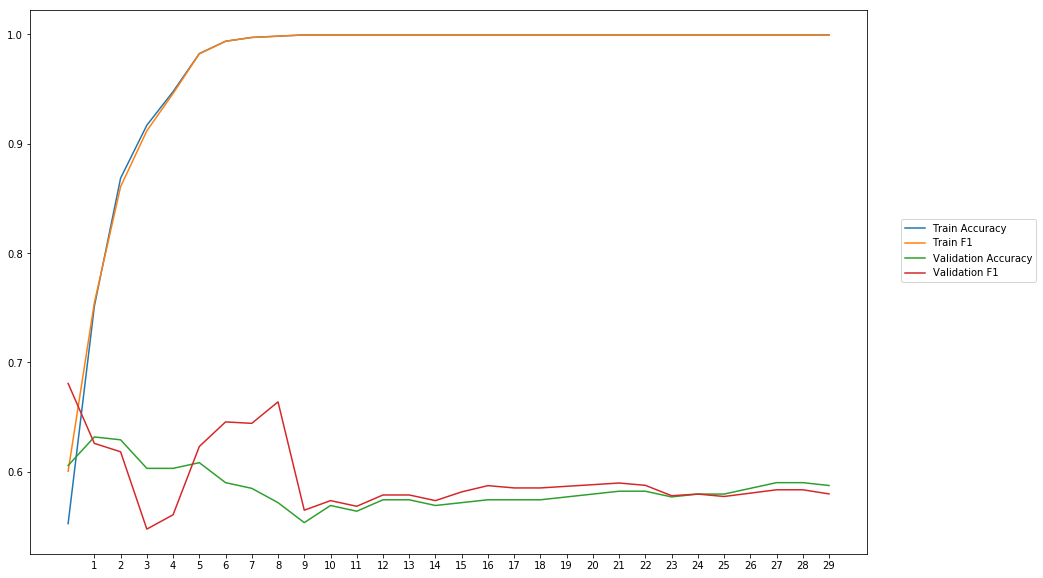

Average Accuracy: 58.46%
Average Precision: 58.10%
Average Recall: 61.31%
Average F1: 59.34%

-------Overallresults-------


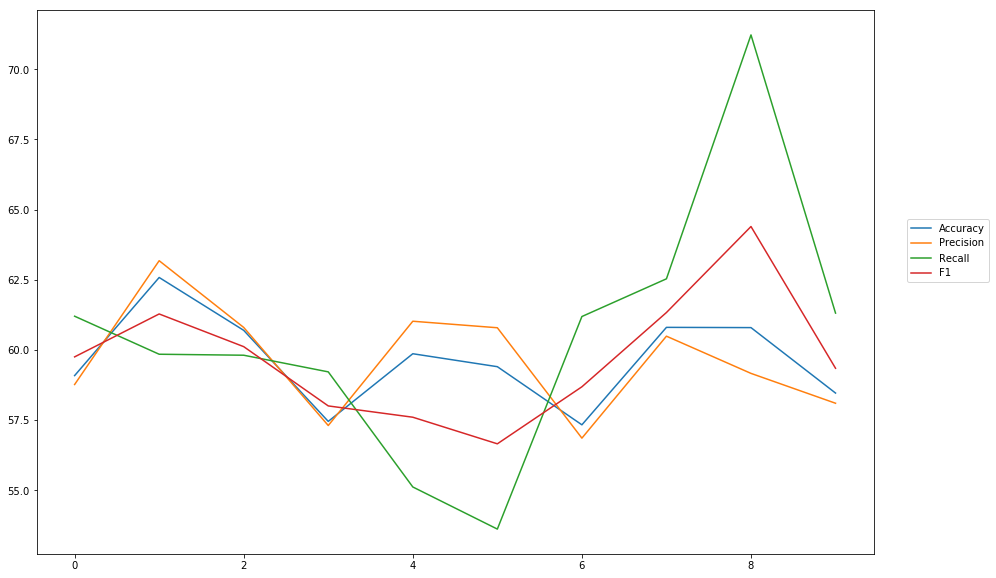

Accuracy: Mean = 59.64% (+/- 1.56%), Max = 62.58%, Min =  57.33%
Precision: Mean = 59.64% (+/- 1.85%), Max = 63.18%, Min =  56.85%
Recall: Mean = 60.50% (+/- 4.47%), Max = 71.22%, Min =  53.61%
F1: Mean = 59.71% (+/- 2.12%), Max = 64.39%, Min =  56.65%


In [16]:
lossfunction ='categorical_hinge'
cross_val(model, EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'categorical_hing_softmax')


-----Fold 1--------


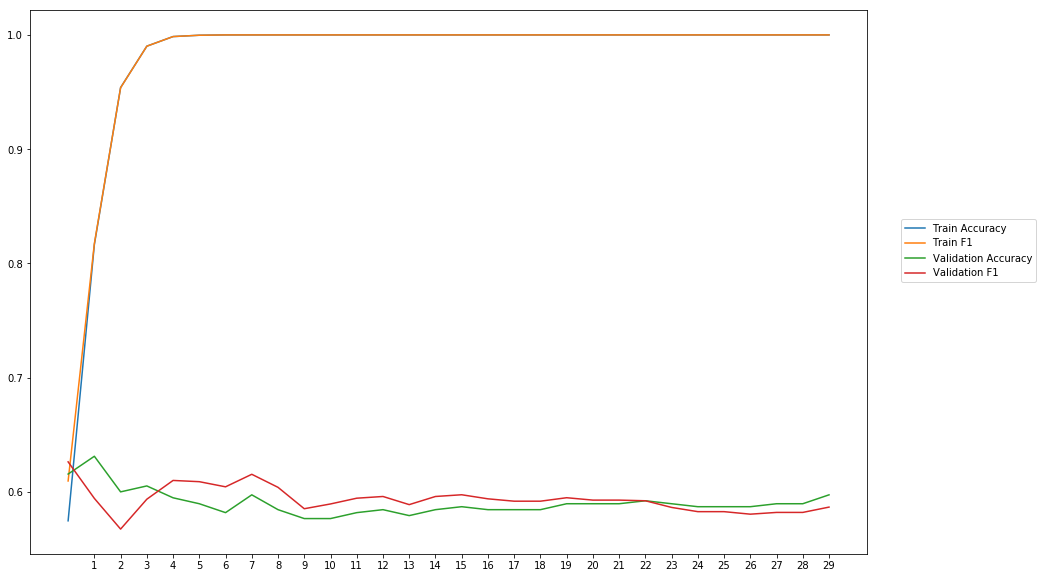

Average Accuracy: 59.04%
Average Precision: 58.83%
Average Recall: 60.02%
Average F1: 59.35%

-----Fold 2--------


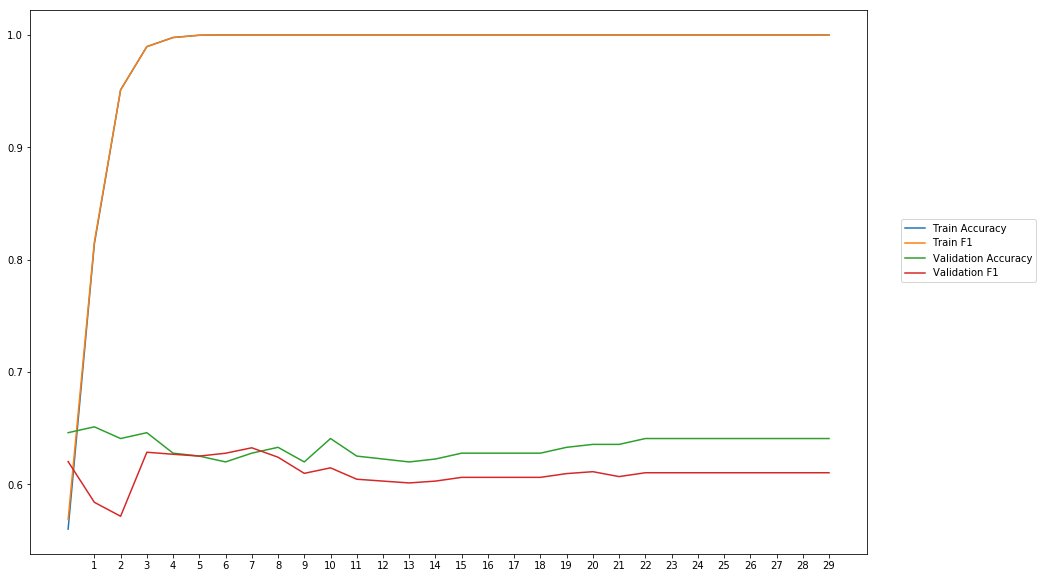

Average Accuracy: 63.35%
Average Precision: 64.93%
Average Recall: 57.78%
Average F1: 61.02%

-----Fold 3--------


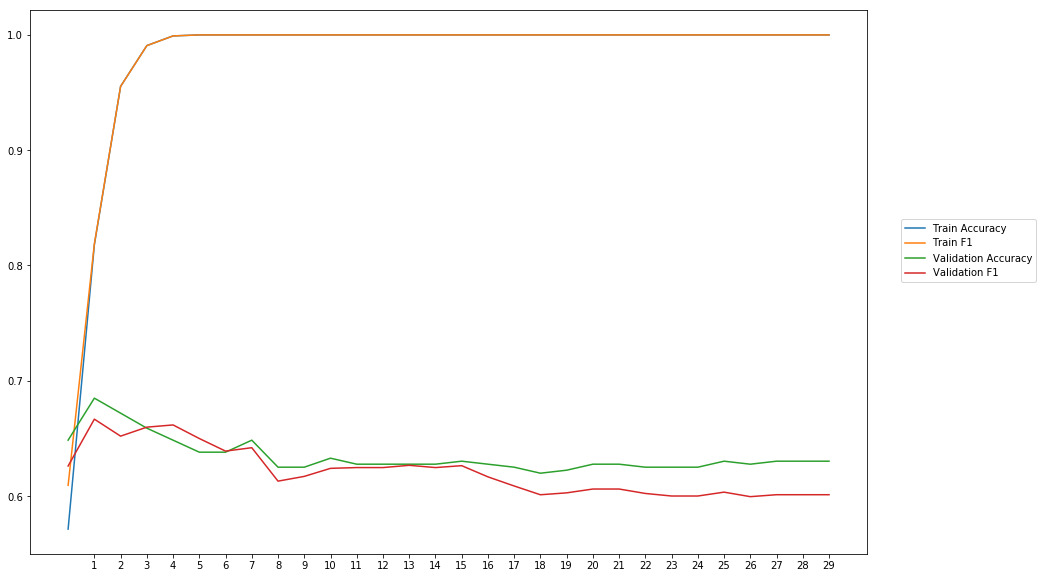

Average Accuracy: 63.45%
Average Precision: 64.14%
Average Recall: 60.30%
Average F1: 62.09%

-----Fold 4--------


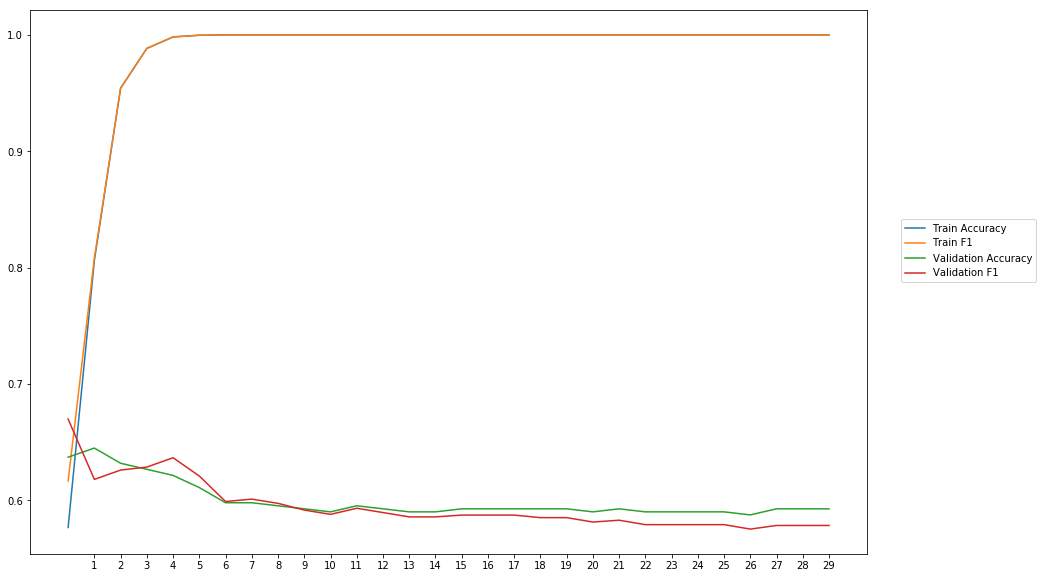

Average Accuracy: 59.96%
Average Precision: 60.00%
Average Recall: 59.13%
Average F1: 59.51%

-----Fold 5--------


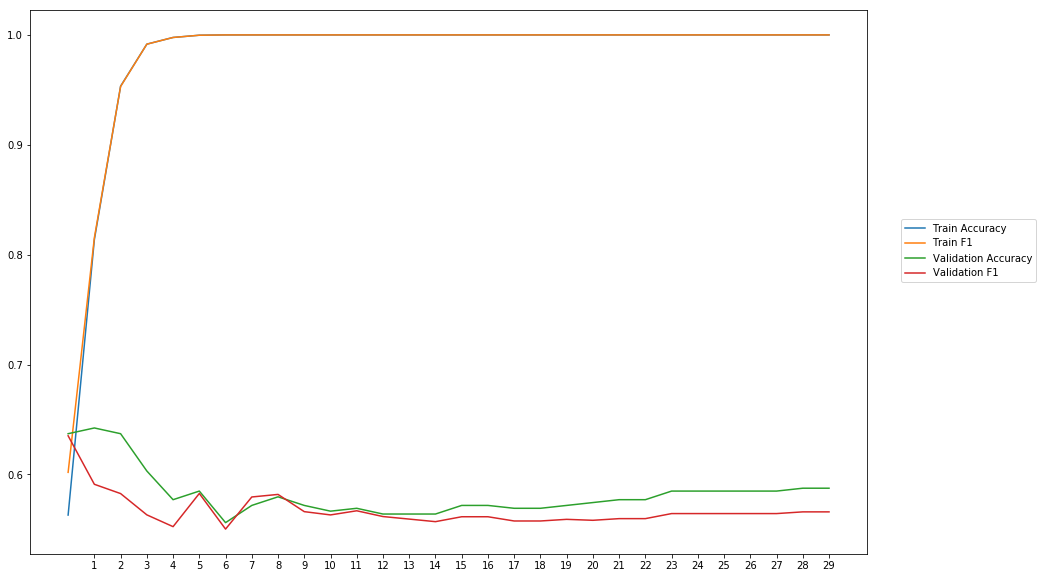

Average Accuracy: 58.23%
Average Precision: 58.86%
Average Recall: 54.92%
Average F1: 56.74%

-----Fold 6--------


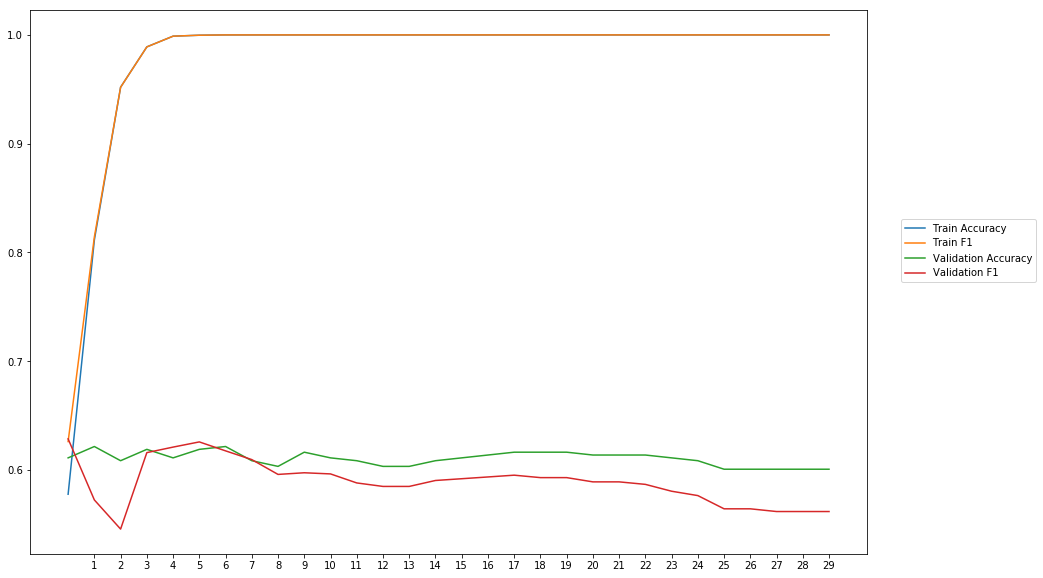

Average Accuracy: 61.03%
Average Precision: 62.14%
Average Recall: 56.20%
Average F1: 58.91%

-----Fold 7--------


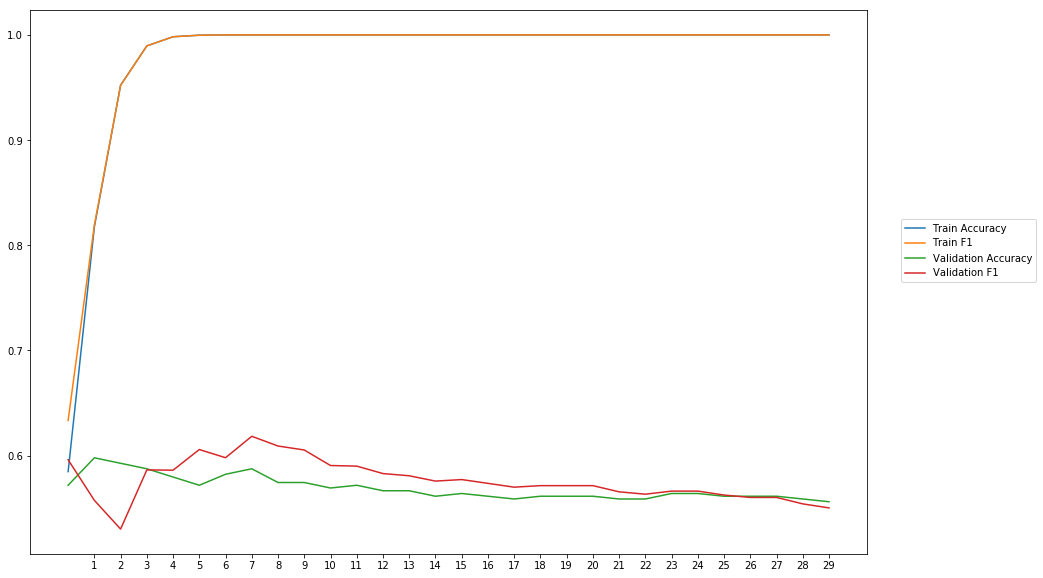

Average Accuracy: 56.89%
Average Precision: 56.59%
Average Recall: 59.02%
Average F1: 57.65%

-----Fold 8--------


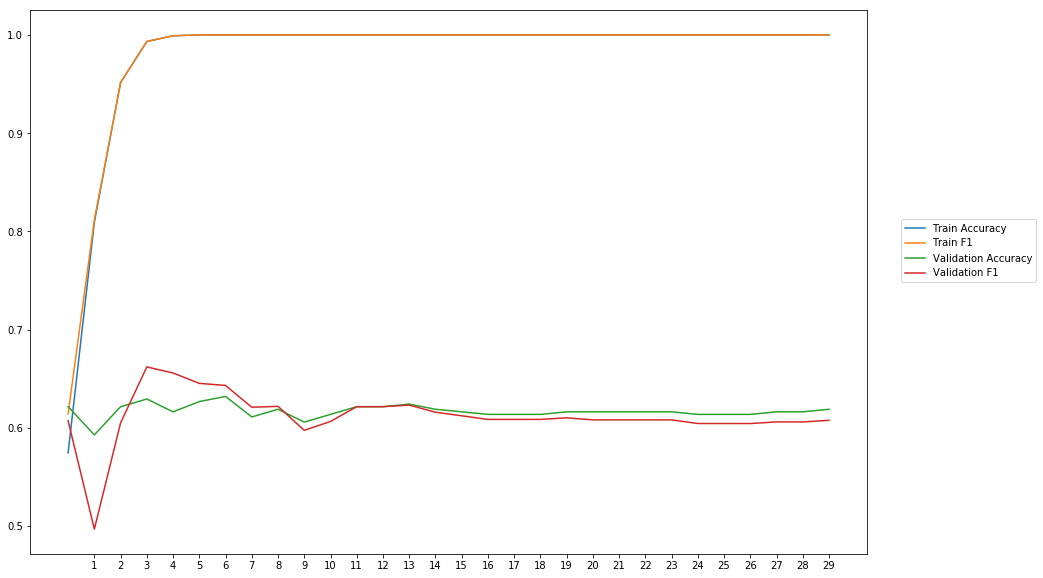

Average Accuracy: 61.68%
Average Precision: 61.82%
Average Recall: 60.87%
Average F1: 61.18%

-----Fold 9--------


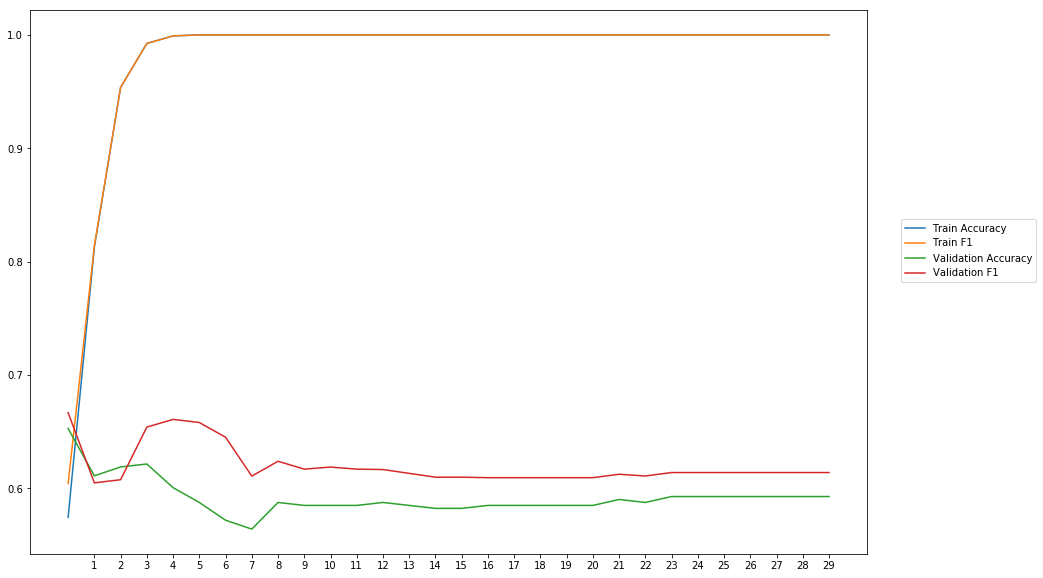

Average Accuracy: 59.19%
Average Precision: 57.96%
Average Recall: 66.89%
Average F1: 62.00%

-----Fold 10--------


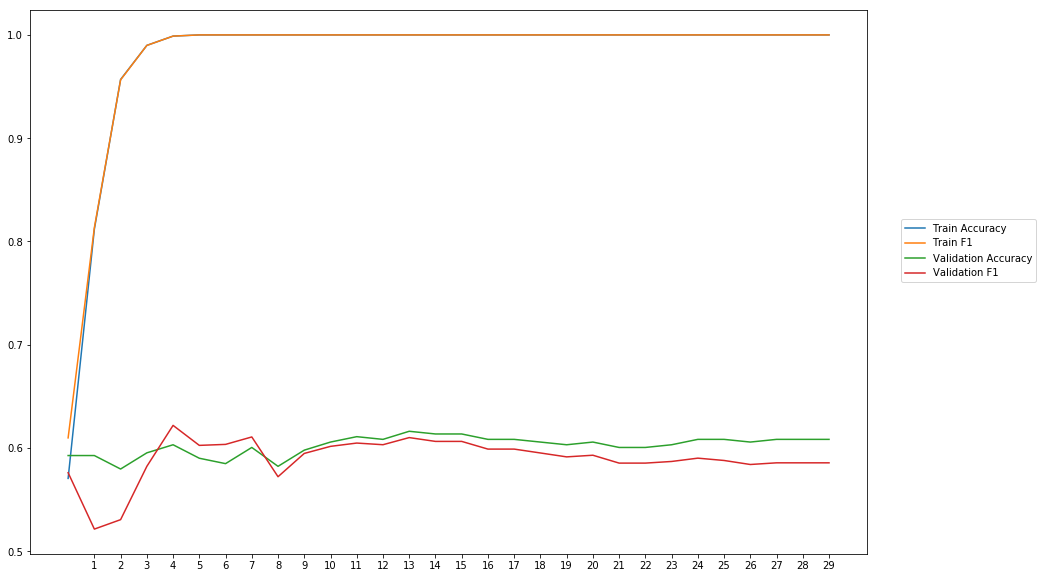

Average Accuracy: 60.23%
Average Precision: 60.74%
Average Recall: 57.56%
Average F1: 59.01%

-------Overallresults-------


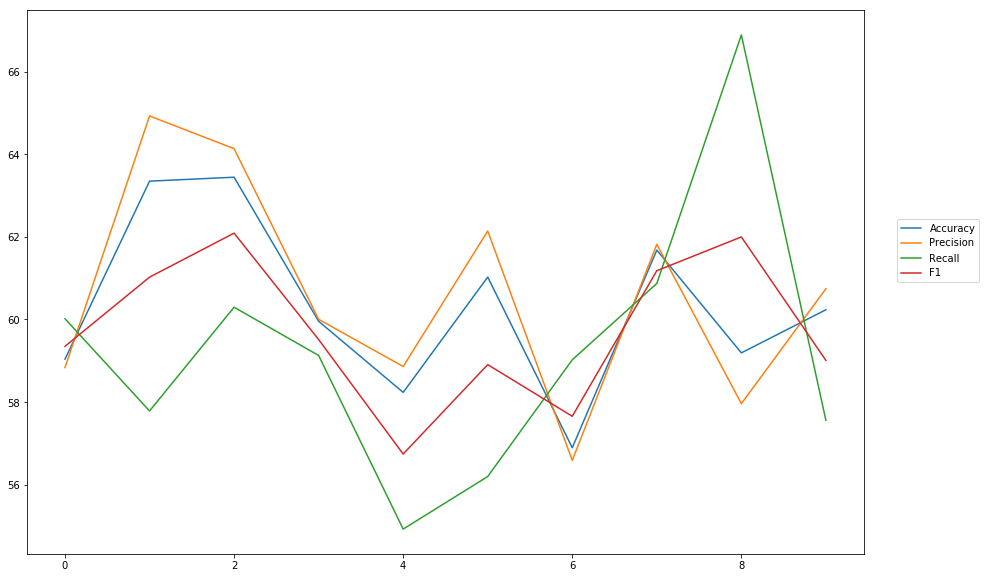

Accuracy: Mean = 60.31% (+/- 2.01%), Max = 63.45%, Min =  56.89%
Precision: Mean = 60.60% (+/- 2.54%), Max = 64.93%, Min =  56.59%
Recall: Mean = 59.27% (+/- 3.10%), Max = 66.89%, Min =  54.92%
F1: Mean = 59.75% (+/- 1.71%), Max = 62.09%, Min =  56.74%


In [18]:
lossfunction ='categorical_crossentropy'
cross_val(model, EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'categorical_crossentropy')


-----Fold 1--------


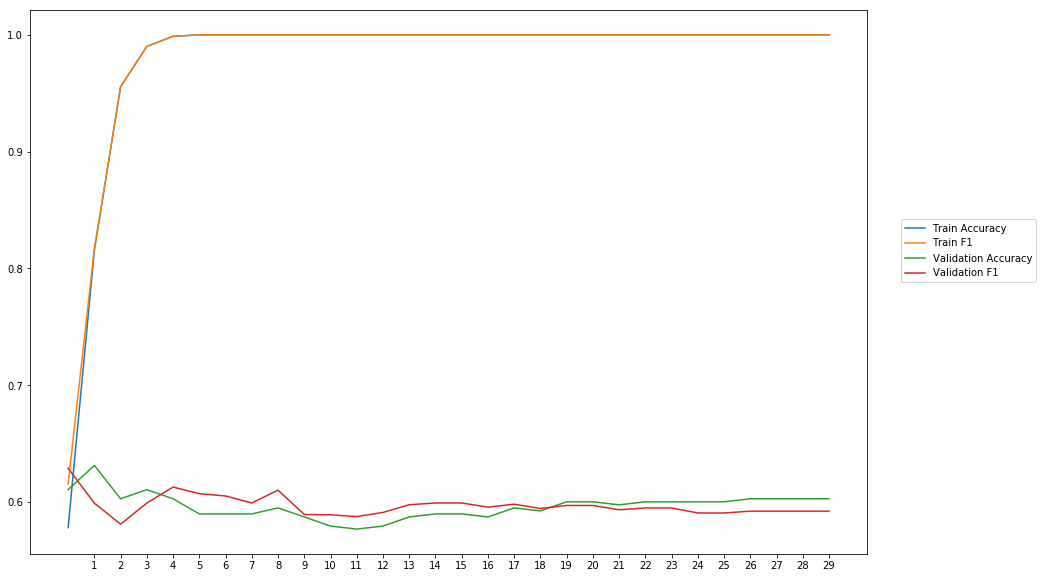

Average Accuracy: 59.64%
Average Precision: 59.54%
Average Recall: 59.95%
Average F1: 59.69%

-----Fold 2--------


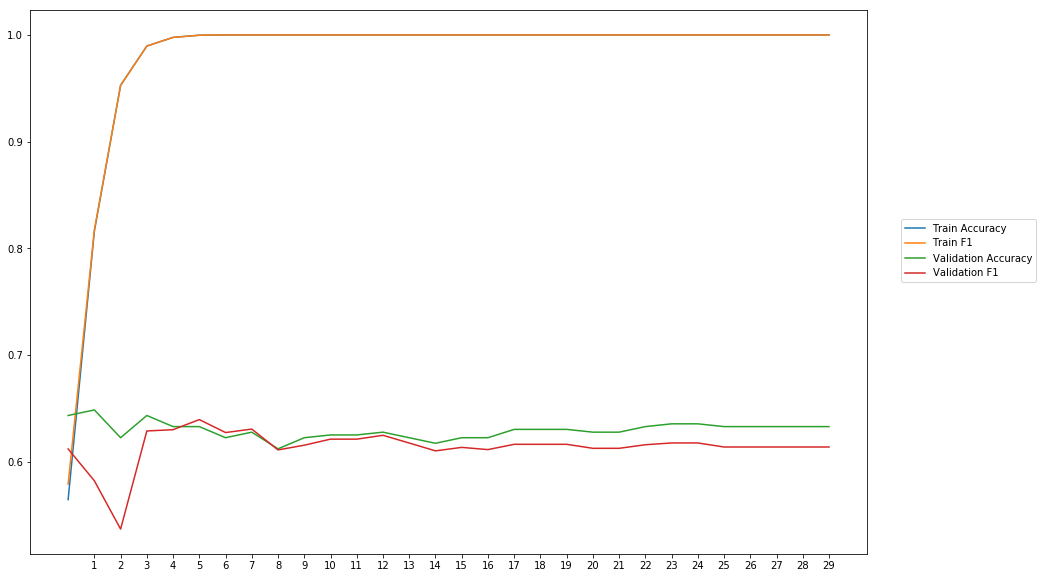

Average Accuracy: 62.94%
Average Precision: 63.82%
Average Recall: 59.46%
Average F1: 61.42%

-----Fold 3--------


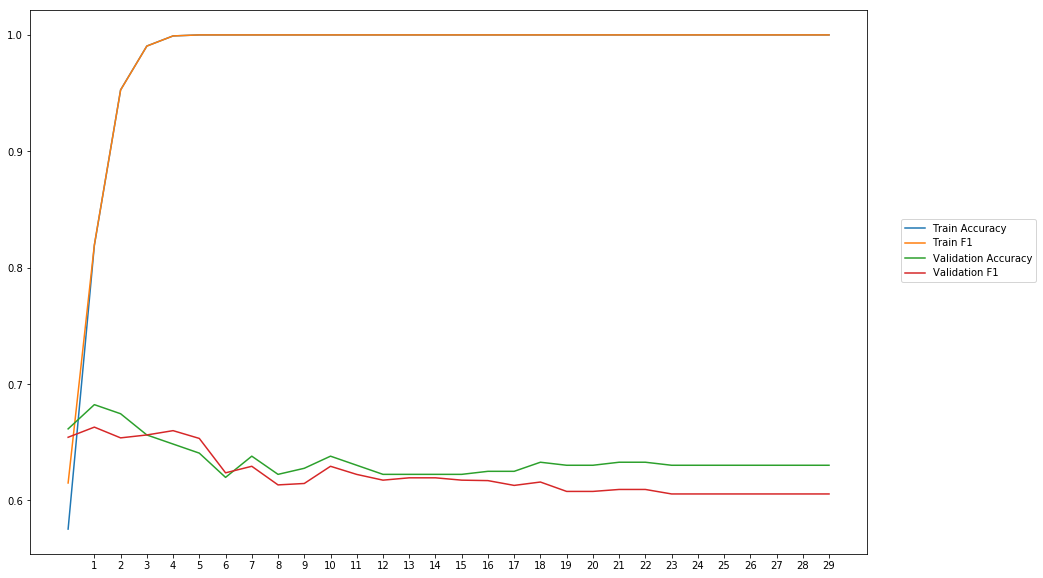

Average Accuracy: 63.50%
Average Precision: 64.15%
Average Recall: 60.51%
Average F1: 62.22%

-----Fold 4--------


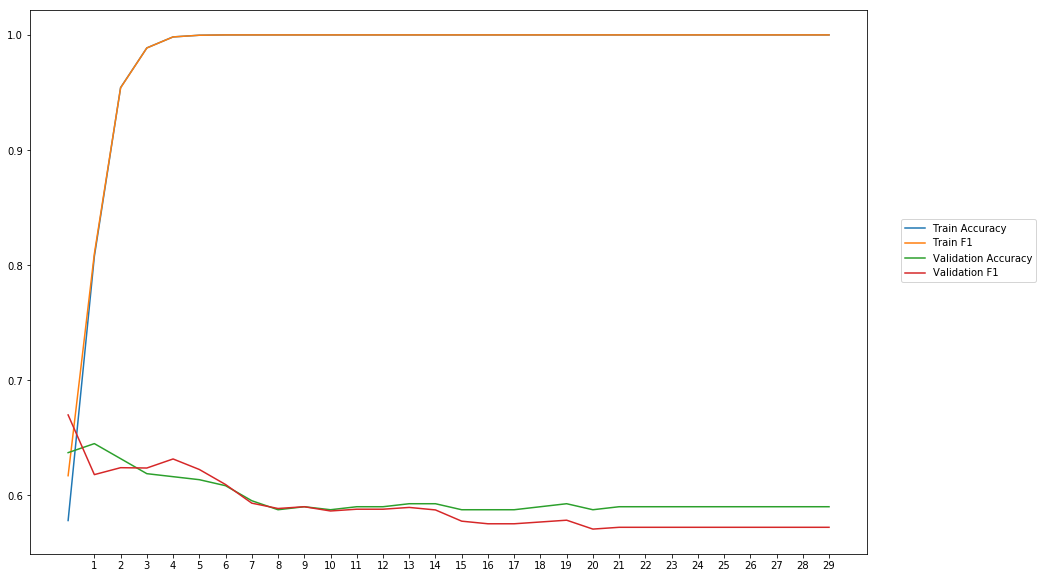

Average Accuracy: 59.80%
Average Precision: 59.99%
Average Recall: 58.25%
Average F1: 59.05%

-----Fold 5--------


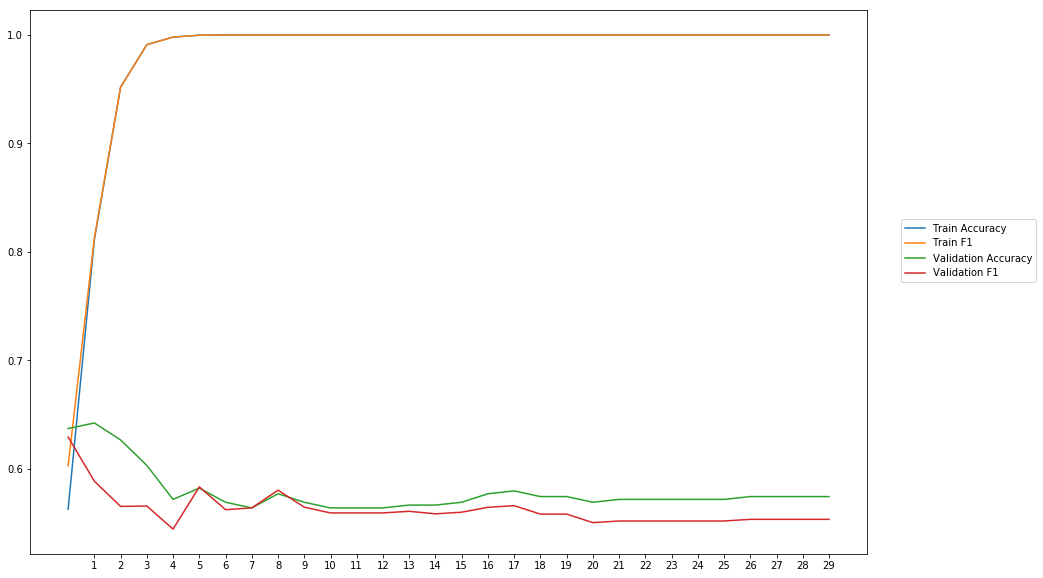

Average Accuracy: 57.89%
Average Precision: 58.54%
Average Recall: 54.29%
Average F1: 56.25%

-----Fold 6--------


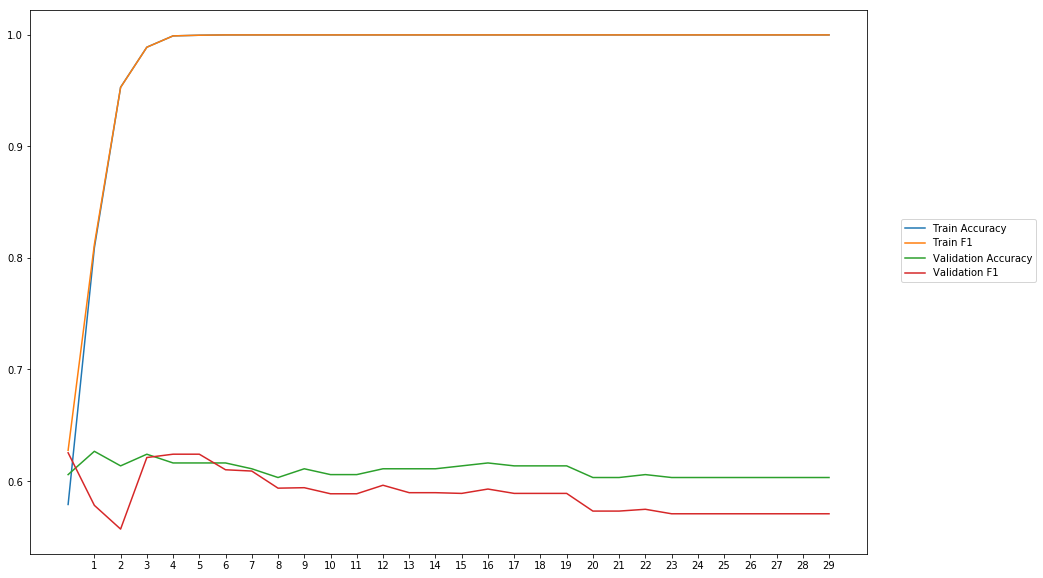

Average Accuracy: 60.97%
Average Precision: 62.10%
Average Recall: 56.09%
Average F1: 58.84%

-----Fold 7--------


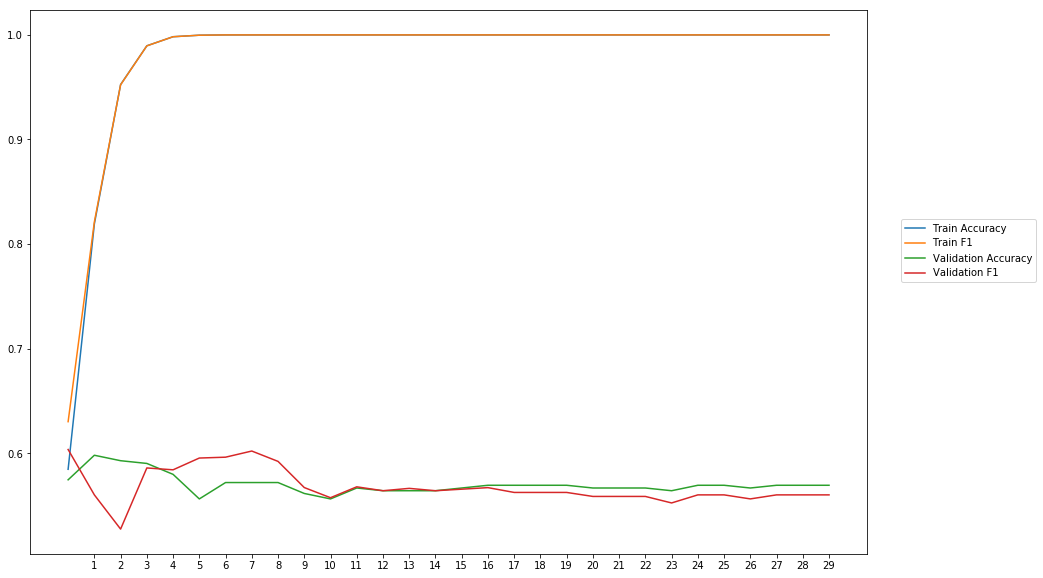

Average Accuracy: 57.01%
Average Precision: 57.02%
Average Recall: 56.79%
Average F1: 56.78%

-----Fold 8--------


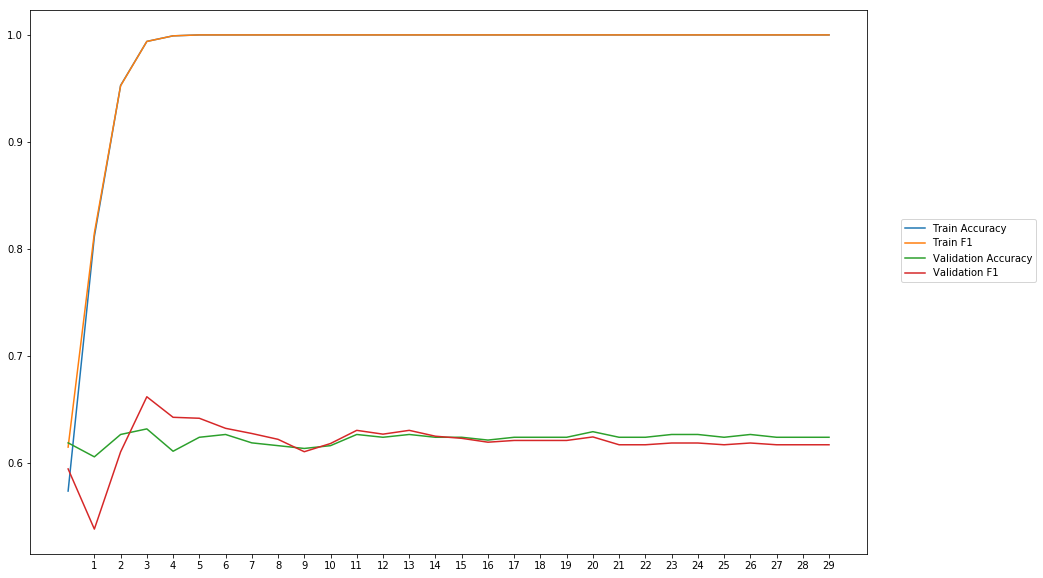

Average Accuracy: 62.27%
Average Precision: 62.31%
Average Recall: 61.92%
Average F1: 62.00%

-----Fold 9--------


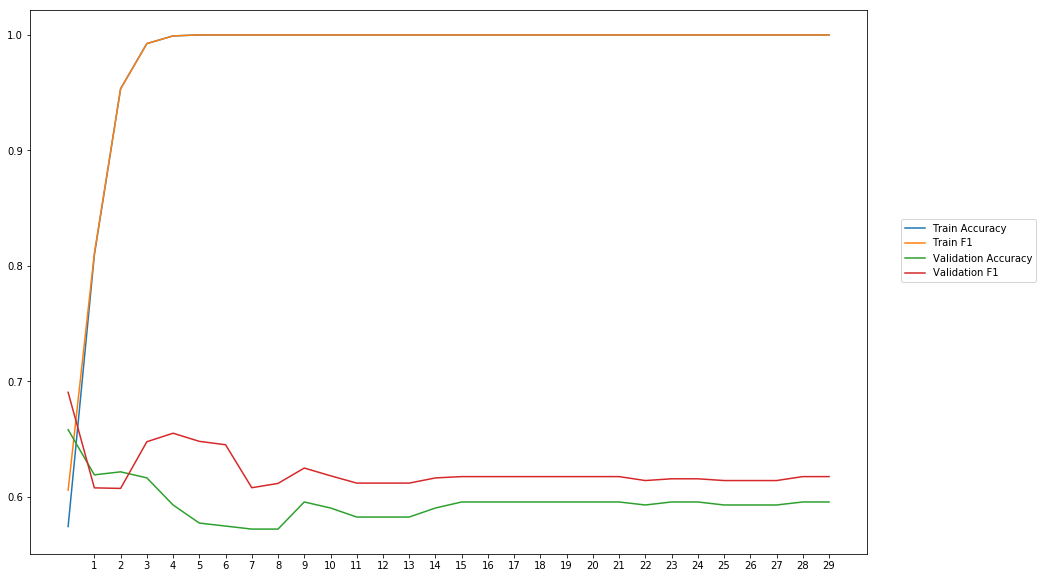

Average Accuracy: 59.48%
Average Precision: 58.24%
Average Recall: 66.95%
Average F1: 62.18%

-----Fold 10--------


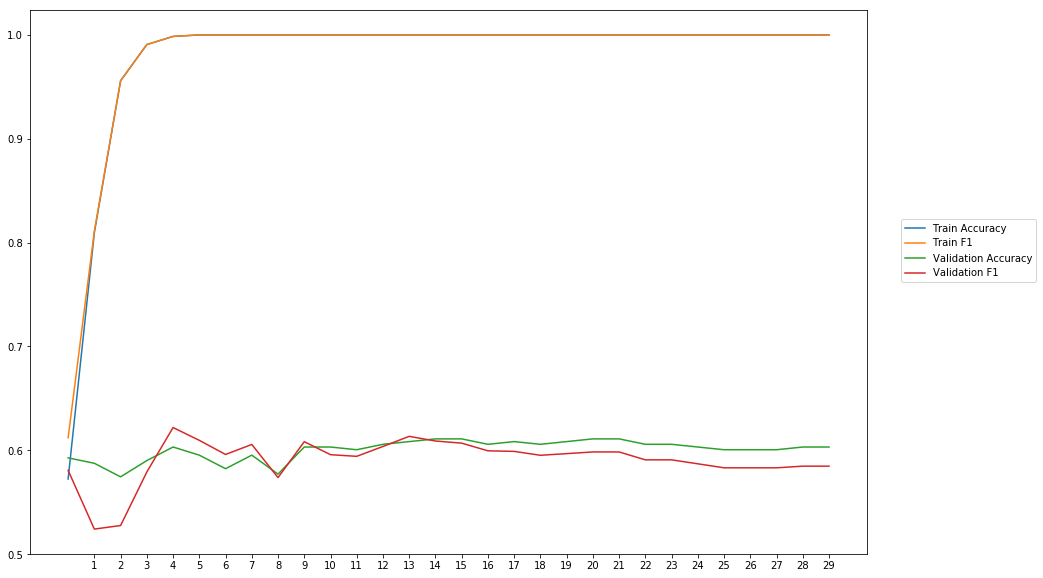

Average Accuracy: 60.04%
Average Precision: 60.38%
Average Recall: 57.99%
Average F1: 59.08%

-------Overallresults-------


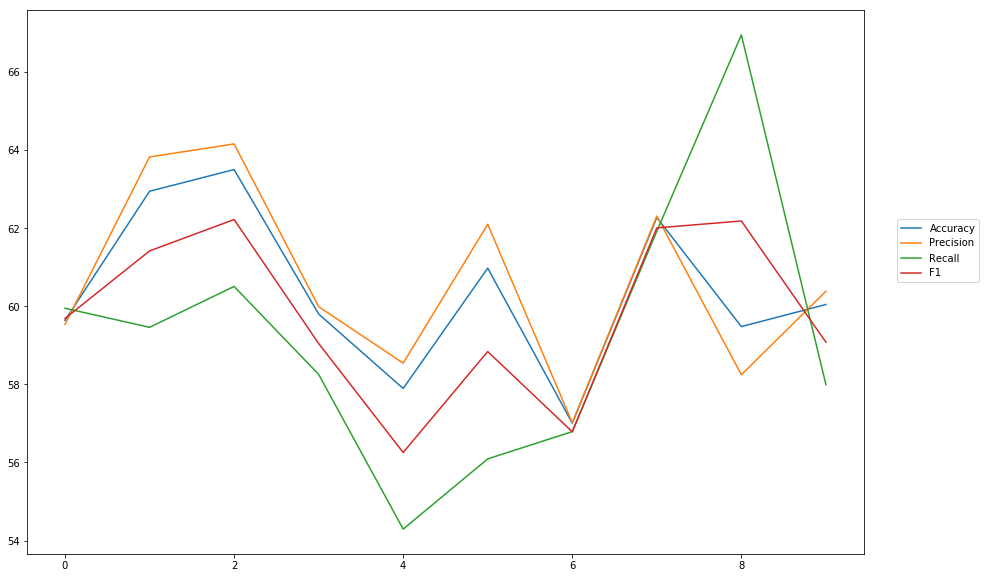

Accuracy: Mean = 60.35% (+/- 1.99%), Max = 63.50%, Min =  57.01%
Precision: Mean = 60.61% (+/- 2.29%), Max = 64.15%, Min =  57.02%
Recall: Mean = 59.22% (+/- 3.34%), Max = 66.95%, Min =  54.29%
F1: Mean = 59.75% (+/- 2.07%), Max = 62.22%, Min =  56.25%


In [19]:
lossfunction ='kullback_leibler_divergence'
cross_val(model, EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'kullbacg_leibler')


-----Fold 1--------


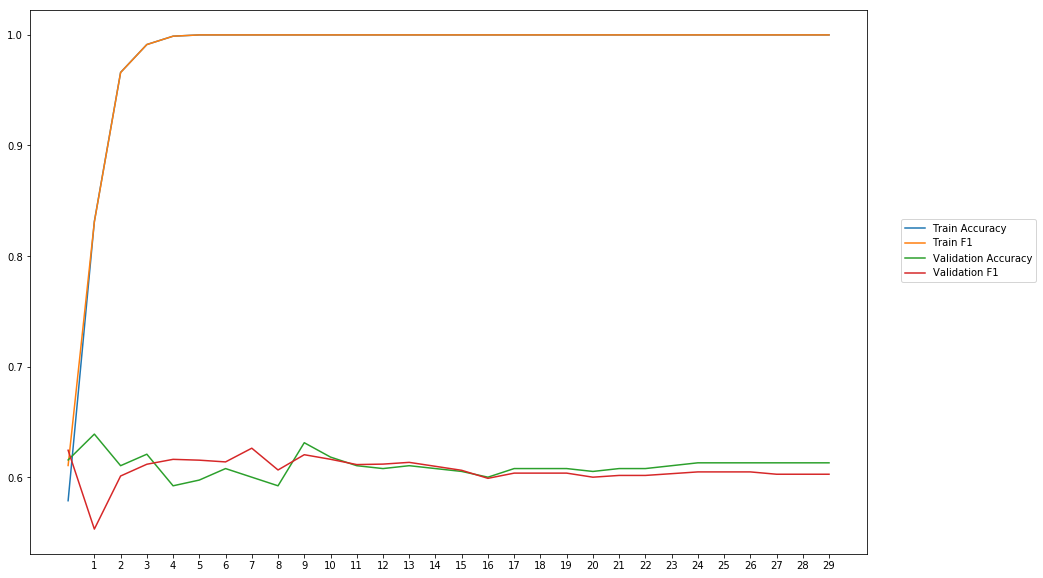

Average Accuracy: 61.00%
Average Precision: 61.20%
Average Recall: 60.40%
Average F1: 60.65%

-----Fold 2--------


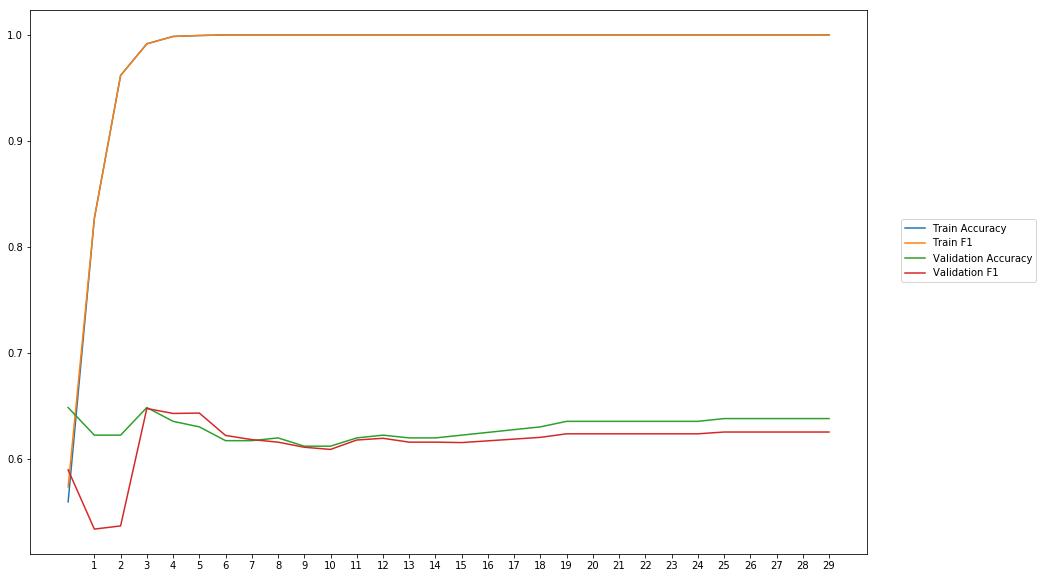

Average Accuracy: 62.92%
Average Precision: 63.66%
Average Recall: 60.07%
Average F1: 61.60%

-----Fold 3--------


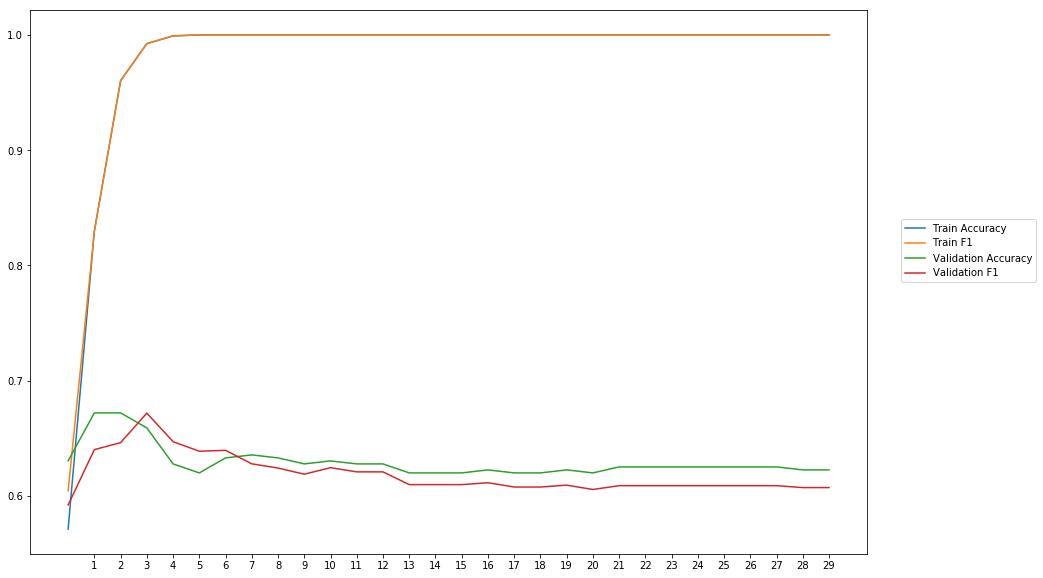

Average Accuracy: 62.93%
Average Precision: 63.41%
Average Recall: 60.51%
Average F1: 61.85%

-----Fold 4--------


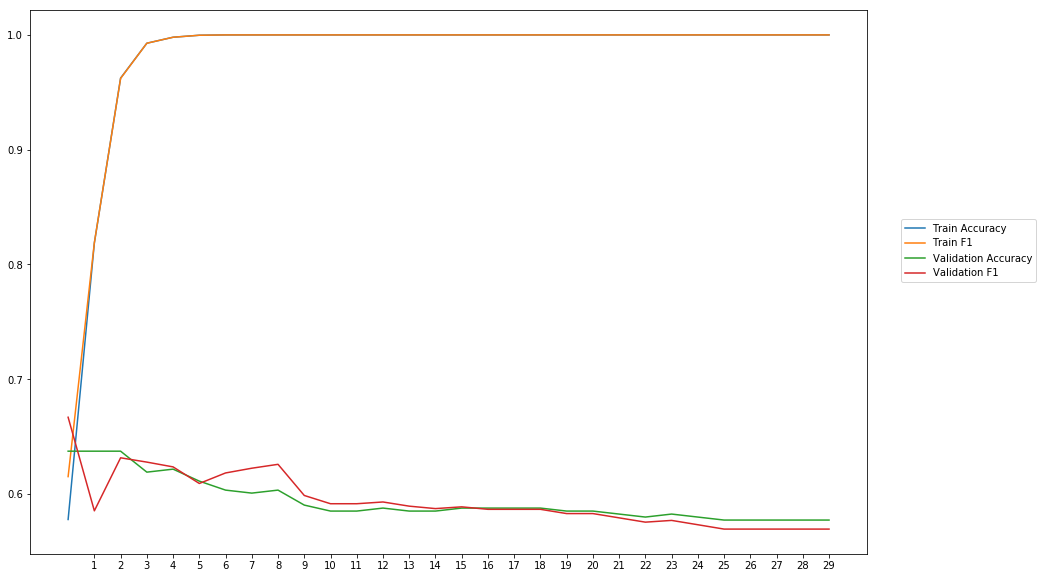

Average Accuracy: 59.38%
Average Precision: 59.25%
Average Recall: 59.72%
Average F1: 59.40%

-----Fold 5--------


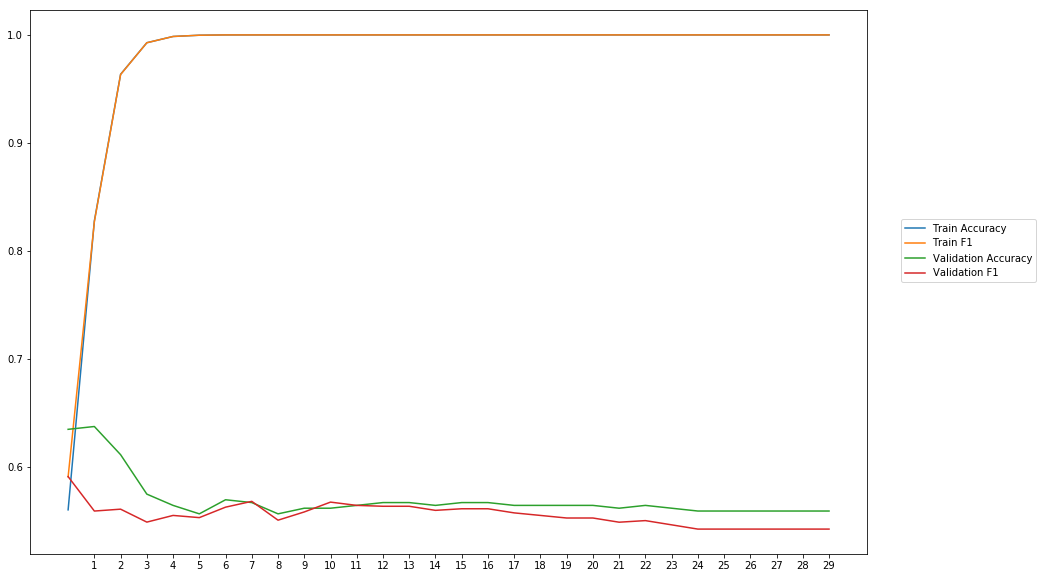

Average Accuracy: 56.94%
Average Precision: 57.51%
Average Recall: 53.87%
Average F1: 55.52%

-----Fold 6--------


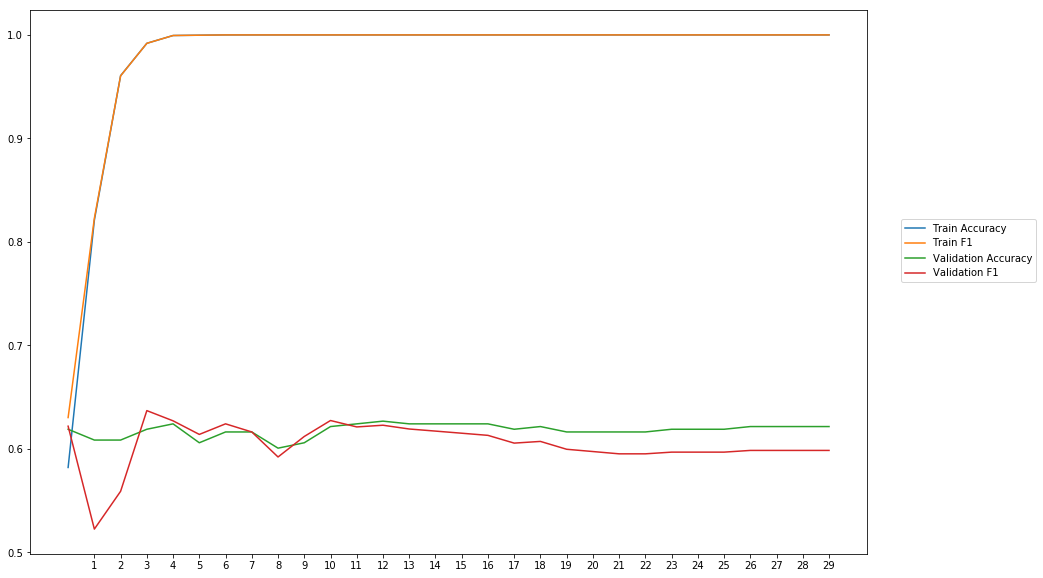

Average Accuracy: 61.79%
Average Precision: 62.51%
Average Recall: 58.83%
Average F1: 60.47%

-----Fold 7--------


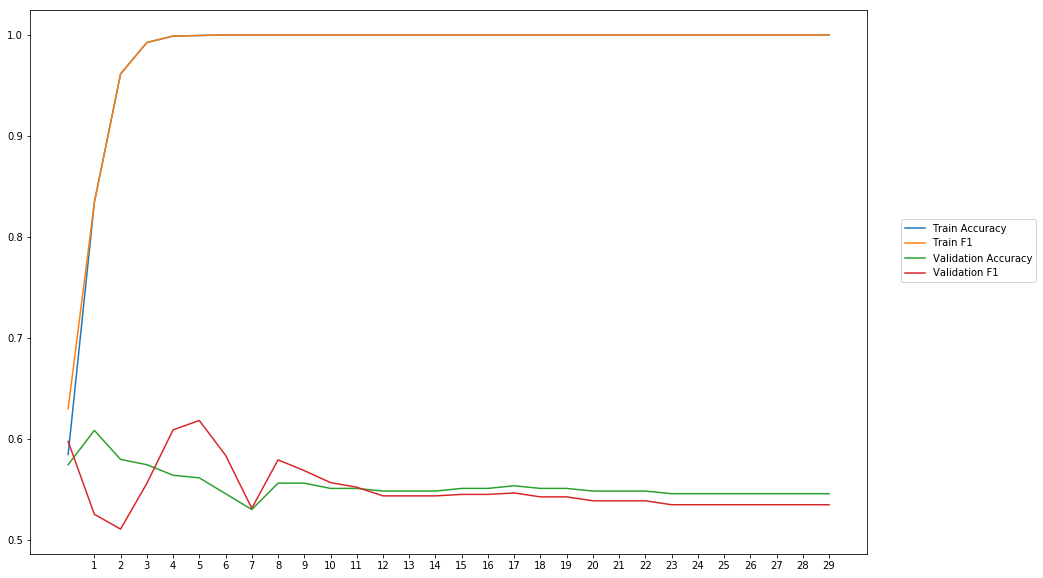

Average Accuracy: 55.40%
Average Precision: 55.51%
Average Recall: 54.94%
Average F1: 55.00%

-----Fold 8--------


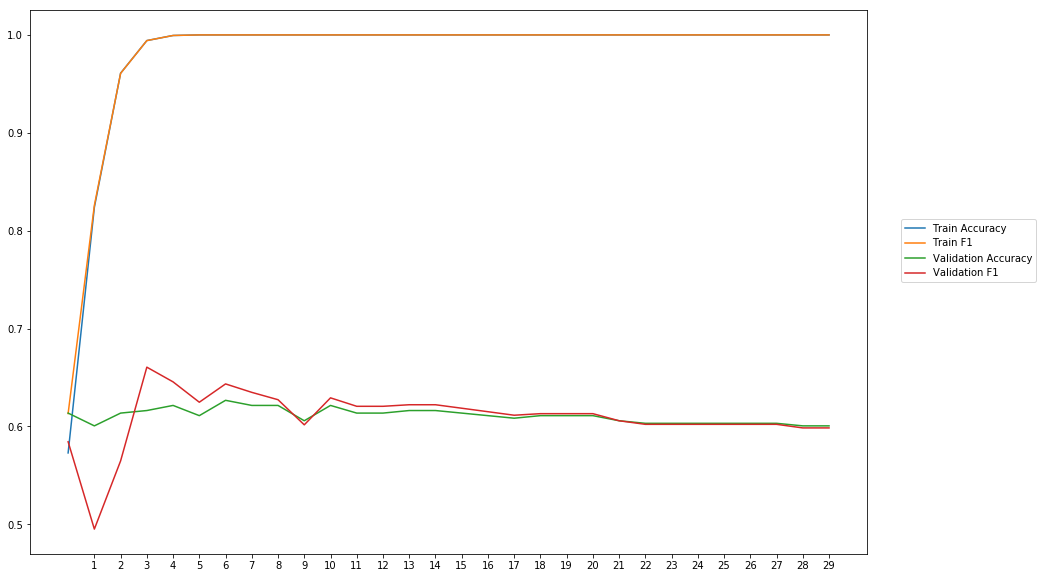

Average Accuracy: 61.08%
Average Precision: 61.02%
Average Recall: 61.38%
Average F1: 60.98%

-----Fold 9--------


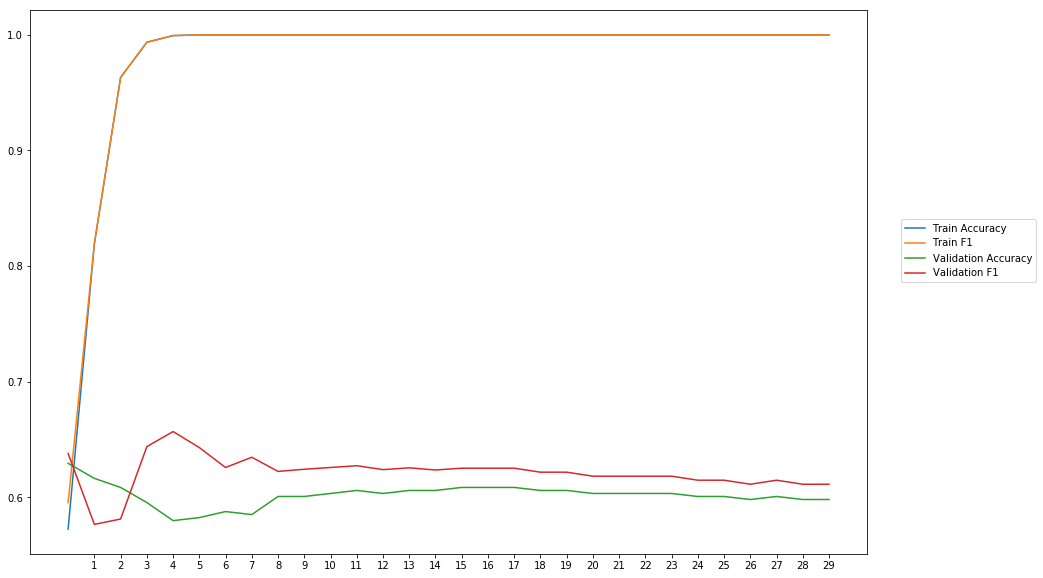

Average Accuracy: 60.17%
Average Precision: 59.21%
Average Recall: 65.71%
Average F1: 62.13%

-----Fold 10--------


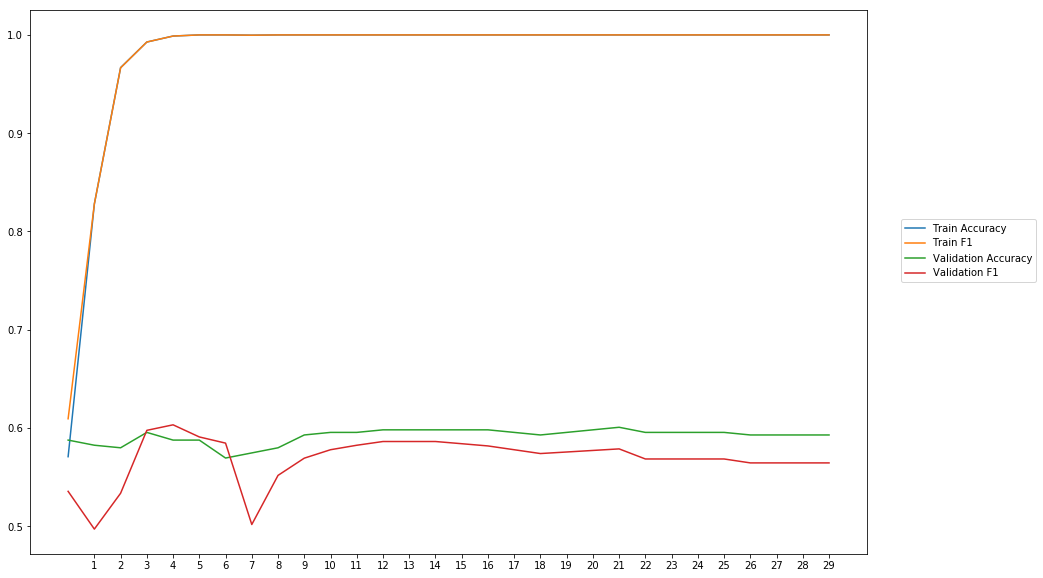

Average Accuracy: 59.16%
Average Precision: 60.11%
Average Recall: 54.19%
Average F1: 56.86%

-------Overallresults-------


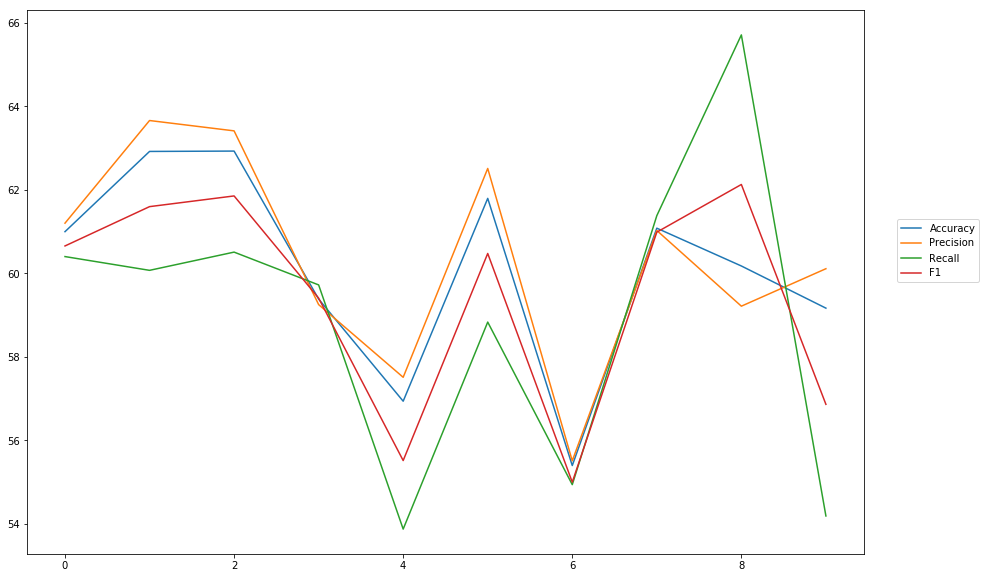

Accuracy: Mean = 60.08% (+/- 2.33%), Max = 62.93%, Min =  55.40%
Precision: Mean = 60.34% (+/- 2.45%), Max = 63.66%, Min =  55.51%
Recall: Mean = 58.96% (+/- 3.50%), Max = 65.71%, Min =  53.87%
F1: Mean = 59.45% (+/- 2.54%), Max = 62.13%, Min =  55.00%


In [20]:
lossfunction ='cosine_proximity'
cross_val(model, EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'cosine_proximity')

## Test the best model with heldout testdata

Instructions for updating:
Use tf.cast instead.


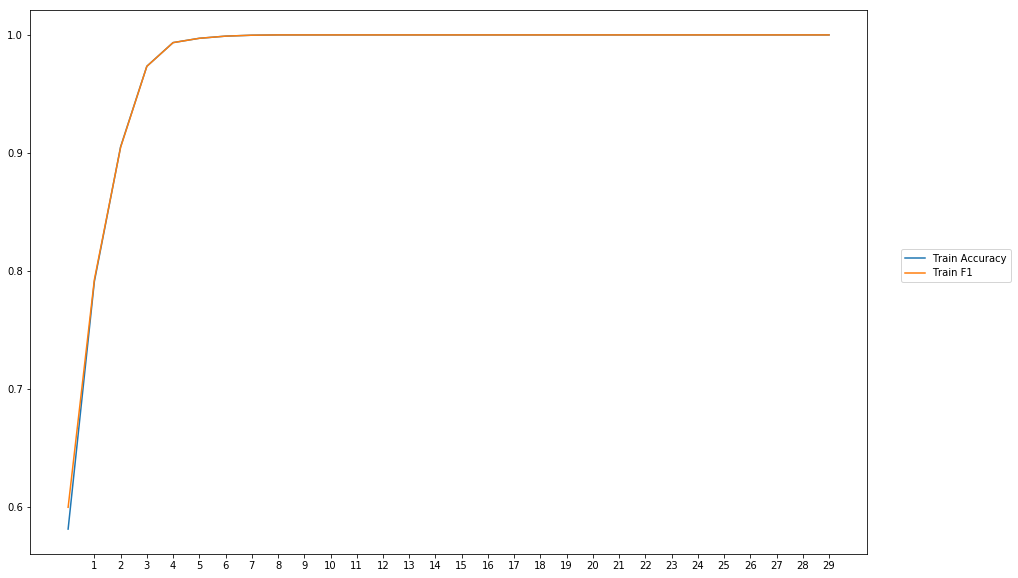


-----Test Scores----
Loss: 0.6430991620433574
Accuracy: 66.07142857142857
Precision: 55.319148923092406
Recall: 75.24115753207681
F1: 63.76021308269459


In [10]:
train_evaluate_final_model(model, EPOCHS, BATCH_SIZE, optimizer, 'squared_hinge' , train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_lossfuction')